# TDL 5.1 Thinking with Deep Learning: Week 5 Part 1
# Deep Learning with Graphs, Networks, and Manifolds

__Instructor:__ James Evans

__Teaching Assistants & Content Creators/Organisers:__ Bhargav Srinivasa Desikan (Notebook Author), Likun Cao (Notebook Reviewer)

In this notebook we will be exploring the world of deep learning for graphs, and all its contours. 

You will notice some code from previous tutorials featuring graphs and networks, such as setting up a basic network and creating node2vec embeddings. We will be building on these methods in this notebook.


# Network Data

This section walks us through dealing with different kinds of network data and how to create representations of them which we can later use for ML and DL algorithms. We will also walk through some basic analysis we can do on networks and statistics we can pass to different models. 

**IMPORTANT**

Here are some resources for graph and network data:
- Open Graph Benchmark - https://github.com/snap-stanford/ogb
- SNAP - http://snap.stanford.edu/data/index.html

You can also find many social networks and graph datasets on popular graph based packages such as karateclub, StellarGraph, and PyTorch_geometric.

In [ ]:
import numpy as np
import networkx as nx

We mentioned that graphs are a way to represent connections between entities. From a mathematical perspective, this can be a set, one with information of the entities and the other with information on the edges (connections). It can also be a matrix or table, where each node is both a row and column, and the intersection of row, column indicates a connection between the two entities. Luckily, both of these are easy to translate into a computational perspective. Let's try it out.

In [ ]:
G = nx.Graph()

So now we have an empty graph object. In networkx we can add nodes and edges easily, and also convert this into a numpy matrix representation.

In [ ]:
# adding one at a time
G.add_node(1)

In [ ]:
# adding a list 
G.add_nodes_from([2, 4])

In [ ]:
G.nodes()

NodeView((1, 2, 4))

In [ ]:
# we can add edges / connection
G.add_edge(1, 2)

In [ ]:
# list of edges
G.add_edges_from([(1, 4), (2, 4)])

In [ ]:
G.edges()

EdgeView([(1, 2), (1, 4), (2, 4)])

In [ ]:
G[1][2]['weight'] = 2

In [ ]:
nx.to_numpy_matrix(G)

matrix([[0., 2., 1.],
        [2., 0., 1.],
        [1., 1., 0.]])

So we see how each of the nodes here are one a column, and the values in the matrix represent the weights. Networkx also lets us draw the matrix.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

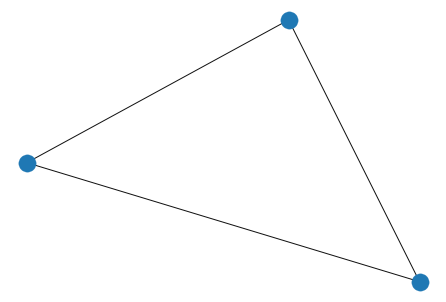

In [ ]:
nx.draw(G)

Networkx also lets you convert graphs to and from pandas, numpy, lists, dictionaries.. and so on. We highly recommend you check out for a full list of the functions which help you do this converting: https://networkx.org/documentation/stable//reference/convert.html

This means we can manipulate graphs in many ways and in different data formats. 
Another way to play with graphs is generate graphs from random processes, or load graphs which are already created by others. Let's check both out!

In [ ]:
random_graph = nx.fast_gnp_random_graph(n=15, p=0.5)

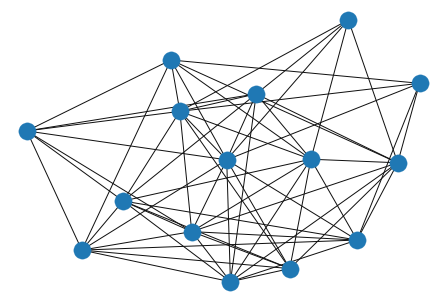

In [ ]:
nx.draw(random_graph)

There are also a couple of popular, small networks which are created through different kinds of data collection - in this case, it is an anthropological study. 

Zachary W. (1977). An information flow model for conflict and fission in small groups. Journal of Anthropological Research, 33, 452-473.

In [ ]:
karate_club_graph = nx.karate_club_graph()

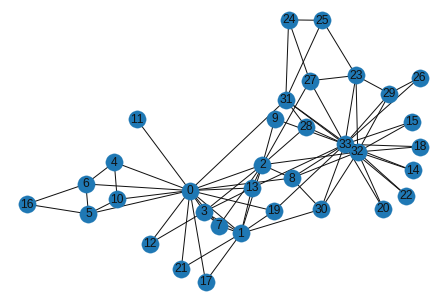

In [ ]:
nx.draw(karate_club_graph, with_labels=True)

In [ ]:
nx.to_numpy_matrix(karate_club_graph)

matrix([[0., 1., 1., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 1.],
        [0., 0., 1., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.]])

Some common tasks involving networks includes link prediction and node classification. For these kinds of tasks, certain network features are useful. Networkx has a full suite of network related algorithms: https://networkx.org/documentation/stable/reference/algorithms/index.html

Let's see one such example with degree centrality, which is a measure of how central different nodes are as a function of the number of edges associated with it.

In [ ]:
nx.degree_centrality(karate_club_graph)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

Network science is a vast field deeply linked (pun intended) with data science. While we'll look at deep learning for graphs and tables in more detail on the dedicated chapter to it, let's whip up a few basic graph-based embeddings to see what they say!



## Generating Random Graphs

We briefly saw this in the above section with the karate club when we created a small random graph.

[Random graphs](https://en.wikipedia.org/wiki/Random_graph) are graphs which are generated over a random process - it is possible to control for different characteristics of a graph, such as the nodes, edges, and communities in the graph/network. While we won't dive deep into such processes as they are beyond the scope of this notebook, being aware of such random graphs and being able to use them is an important skill.

Networkx offers many ways to generate graphs.
- [networkx](https://networkx.org/documentation/stable/reference/generators.html)
- [pyrgg](https://pypi.org/project/pyrgg/) 

In [26]:
random_newman_real_world_graph = nx.newman_watts_strogatz_graph(100, 20, 0.05)

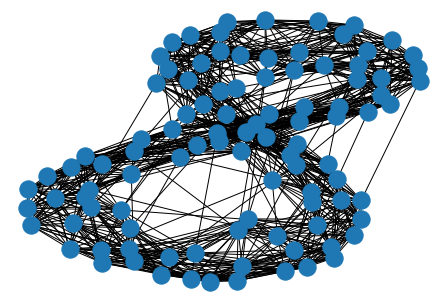

In [27]:
nx.draw(random_newman_real_world_graph)

## Sampling from Graphs

Sampling sub-graphs from very large graphs is another important problem in this domain. 

[little ball of fur](https://github.com/benedekrozemberczki/littleballoffur) is a python package which is specialised in sampling procedures on graphs and networks.

In [28]:
!pip install littleballoffur

     |████████████████████████████████| 8.4MB 5.6MB/s 
     |████████████████████████████████| 3.1MB 52.8MB/s 
  Created wheel for littleballoffur: filename=littleballoffur-2.1.8-cp37-none-any.whl size=40212 sha256=2369f5e765dd0ae77c16e77c6a996b6b036685b7c7ccafdf3d4bc8aad22a73cb
  Stored in directory: /root/.cache/pip/wheels/3d/09/b2/b2a80c4b1d51cc7de09f8de267455bcb40cd0b43c19dc79fa7
  Created wheel for networkit: filename=networkit-7.1-cp37-cp37m-linux_x86_64.whl size=8043038 sha256=213ac3461620f8991556e22480b17cceef11efc4b094279d451d44b33a88b873
  Stored in directory: /root/.cache/pip/wheels/a2/ca/1c/a1096b1823f845c29784ce5106866b01eaad26d101a79032b8
Successfully built littleballoffur networkit
ERROR: scikit-network 0.23.1 has requirement numpy>=1.20.2, but you'll have numpy 1.19.5 which is incompatible.
ERROR: scikit-network 0.23.1 has requirement scipy>=1.6.2, but you'll have scipy 1.4.1 which is incompatible.


In [29]:
from littleballoffur import DiffusionSampler

sampler = DiffusionSampler()
new_graph = sampler.sample(random_newman_real_world_graph)

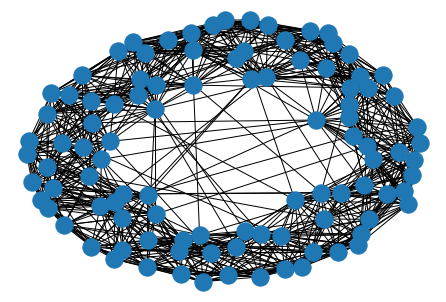

In [30]:
nx.draw(new_graph)

Now that we've seen some basic graph functions, we can jump into using neural and related methods on graphs.

# Graph Based Shallow Embeddings

[node2vec](https://arxiv.org/abs/1607.00653) (Grover and Lescovec, 2016) is one such popular embedding. Intuition: Find embedding of nodes to ddimensions so that “similar” nodes in the graph have embeddings that are close together.

In [ ]:
!pip install node2vec

  Created wheel for node2vec: filename=node2vec-0.4.2-cp37-none-any.whl size=5859 sha256=7fbff7d8c6c1f5d95c807a0520b352fbe1d5dceb2ad52605ab1ef8a31c801c7c
  Stored in directory: /root/.cache/pip/wheels/2a/d6/34/7f62d314dfad813eea2a41c5e4a9dedec1f52e335688c8f7ad
Successfully built node2vec


In [ ]:
from node2vec import Node2Vec

In [ ]:
node2vec = Node2Vec(karate_club_graph, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs

In [ ]:
model = node2vec.fit(window=10, min_count=1, batch_words=4)

In [ ]:
model.wv.get_vector('0')

array([ 0.15762697, -0.18605642,  0.07364643,  0.163874  ,  0.0932318 ,
       -0.08443581,  0.04866835, -0.06432379,  0.03173653, -0.12058084,
        0.12813032, -0.15884182,  0.08943676,  0.04225414,  0.12103442,
        0.06024123,  0.05379201,  0.1331644 ,  0.09332473, -0.01389903,
        0.16231145, -0.21323952,  0.09988832, -0.06634133, -0.14467089,
        0.15454692, -0.3203181 , -0.01026955,  0.06122162, -0.02913745,
        0.25325772, -0.22589388,  0.04372282,  0.24044973, -0.3514385 ,
        0.20914689,  0.10297947, -0.07277347, -0.06151325, -0.05074883,
        0.44739994,  0.10660095,  0.1832348 , -0.13509859,  0.16674484,
        0.12768838, -0.14259058,  0.1972201 ,  0.05894215, -0.11284373,
        0.03478132,  0.23172858, -0.06708279,  0.25496235,  0.02008924,
        0.0429641 ,  0.19067618, -0.09622124, -0.14200403, -0.154061  ,
       -0.04086061, -0.01984693,  0.04324224, -0.15633225], dtype=float32)

In [ ]:
model.wv.most_similar('0')

[('11', 0.7307071089744568),
 ('10', 0.7256091833114624),
 ('4', 0.7049136161804199),
 ('19', 0.7024115920066833),
 ('6', 0.7012166380882263),
 ('21', 0.6696214079856873),
 ('5', 0.6690512895584106),
 ('16', 0.6574958562850952),
 ('17', 0.6463863253593445),
 ('13', 0.641478955745697)]

In [ ]:
model.wv.most_similar('33')

[('32', 0.8553497791290283),
 ('14', 0.8182500600814819),
 ('15', 0.7963170409202576),
 ('20', 0.7862218618392944),
 ('22', 0.7846820950508118),
 ('18', 0.7800731062889099),
 ('29', 0.7702298164367676),
 ('26', 0.7504438757896423),
 ('23', 0.7093319892883301),
 ('30', 0.7055432200431824)]

Take some time to interpret the closest nodes based on the node2vec embedding  - what aspect of similarity is best captured? 

the node2vec package also includes edge embeddings, via the Hadamard Embedder.

In [ ]:
from node2vec.edges import HadamardEmbedder

In [ ]:
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

In [ ]:
edges_embs[('24', '25')]

array([ 1.70517259e-03,  1.81653872e-02,  3.62689644e-02, -2.11944547e-03,
        8.43876798e-04,  8.05873796e-03, -9.62678168e-05,  2.54481528e-02,
        2.71689682e-03, -1.06590323e-03,  1.37854880e-02,  2.40604226e-02,
        6.98815612e-03,  5.69937304e-02,  8.61131996e-02,  3.79246660e-02,
        2.24328209e-02,  7.19897673e-02,  4.98884805e-02,  4.21950482e-02,
        1.56385843e-02,  3.61662209e-02,  2.27397755e-02, -2.95842146e-05,
        1.26762213e-02,  4.73922193e-02,  2.16929279e-02,  3.24488021e-02,
       -1.34644820e-03,  1.49150360e-02,  8.21972452e-03,  9.35415458e-03,
        1.17138840e-01,  1.73719246e-02,  1.61552860e-04,  1.89305563e-02,
        5.02215996e-02,  1.05864275e-03,  4.76190969e-02,  1.41858622e-01,
        3.00973132e-02,  1.95461605e-02, -3.86201660e-03,  7.95338899e-02,
        3.61634456e-02,  1.31914735e-01,  2.55640736e-03,  1.27697751e-01,
        1.24569915e-01,  3.78706604e-02,  2.82044336e-02, -9.89313630e-05,
        2.00129915e-02,  

In [ ]:
edges_kv = edges_embs.as_keyed_vectors()

Generating edge features: 100%|██████████| 595/595.0 [00:00<00:00, 71888.55it/s]


In [ ]:
edges_kv.most_similar(str(('24', '25')))

[("('24', '24')", 0.9274815917015076),
 ("('25', '25')", 0.9273289442062378),
 ("('24', '27')", 0.8851883411407471),
 ("('23', '25')", 0.8743038177490234),
 ("('23', '24')", 0.8560078740119934),
 ("('25', '27')", 0.8399050235748291),
 ("('24', '31')", 0.8375473618507385),
 ("('25', '31')", 0.835137665271759),
 ("('24', '28')", 0.7997703552246094),
 ("('25', '28')", 0.7935844659805298)]

These node and edge embeddings can be used for a wide range of other downstream tasks. node2vec serves as a useful way to quickly prototype these alternate approaches to representing a network or graph. It's also possible to embed an entire graph, and then we can measure between two different graphs. Graph Neural Network models also help you perform a series of tasks on graphs such as community detection and link prediction. We'll be seeing this in more detail in later chapters, but hopefully this gave you an idea on the different graph representations out there!

### DeepWalk

Deepwalk is another popular shallow embedding method which uses random walks on a graph combined with word2vec to create embeddings. It was first described in [DeepWalk: Online Learning of Social Representations](https://arxiv.org/pdf/1403.6652.pdf). The GitHub repository with the code is: https://github.com/phanein/deepwalk, where you can run the code via command line.

In the cells below, we adapt the code from this GitHub repository (https://github.com/prateekjoshi565/DeepWalk) which creates it from scratch. You can also download the data in the repository, which is wikipedia data.

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

You can get the dataset from https://densitydesign.github.io/strumentalia-seealsology/

__Steps to download:__

a) Enter the following links:

https://en.wikipedia.org/wiki/Space_research

https://en.wikipedia.org/wiki/Space_Race

https://en.wikipedia.org/wiki/Space_exploration

b) Download the TSV file.

In [ ]:
df = pd.read_csv("space_data.tsv", sep = "\t")

In [ ]:
df.head()

,source,target,depth
0,space exploration,discovery and exploration of the solar system,1
1,space exploration,in-space propulsion technologies,1
2,space exploration,robotic spacecraft,1
3,space exploration,timeline of planetary exploration,1
4,space exploration,landings on other planets,1


In [ ]:
df.shape

(3328, 3)

In [ ]:
# construct an undirected graph
G=nx.from_pandas_edgelist(df, "source", "target", edge_attr=True, create_using=nx.Graph())

In [ ]:
len(G) # number of nodes

2088

In [ ]:
# function to generate random walk sequences of nodes
def get_randomwalk(node, path_length):
    
    random_walk = [node]
    
    for i in range(path_length-1):
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk

In [ ]:
get_randomwalk('space exploration', 10)

['space exploration',
 'atmospheric reentry',
 'mars pathfinder',
 'scientific information from the mars exploration rover mission',
 'opportunity rover',
 'spirit rover',
 'aeolis quadrangle',
 'mars science laboratory',
 'mars 2020',
 'exomars']

In [ ]:
all_nodes = list(G.nodes())

random_walks = []

for n in tqdm(all_nodes):
    for i in range(5):
        random_walks.append(get_randomwalk(n,10))

100%|██████████| 2088/2088 [00:00<00:00, 7717.75it/s]


In [ ]:
# count of sequences
len(random_walks)

10440

In [ ]:
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# train word2vec model
model = Word2Vec(window = 4, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(random_walks, progress_per=2)

In [ ]:
model.train(random_walks, total_examples = model.corpus_count, epochs=20, report_delay=1)

(982438, 1015840)

In [ ]:
print(model)

Word2Vec(vocab=2088, size=100, alpha=0.03)


In [ ]:
# find top n similar nodes
model.similar_by_word('astronaut training')

[('reduced-gravity aircraft', 0.9756266474723816),
 ('micro-g environment', 0.9612352252006531),
 ('spaceflight osteopenia', 0.8710659742355347),
 ('microgravity university', 0.8698078393936157),
 ('space flight participant', 0.8578461408615112),
 ('space adaptation syndrome', 0.8436012268066406),
 ('space tourism society', 0.8100888729095459),
 ('lagrange point colonization', 0.7876768112182617),
 ('stanford torus', 0.7843056321144104),
 ('lists of space programs', 0.7734896540641785)]

In [ ]:
terms = ['lunar escape systems','soviet moonshot', 'soyuz 7k-l1', 'moon landing',
         'space food', 'food systems on space exploration missions', 'meal, ready-to-eat',
         'space law', 'metalaw', 'moon treaty', 'legal aspects of computing',
         'astronaut training', 'reduced-gravity aircraft', 'space adaptation syndrome', 'micro-g environment']

In [ ]:
def plot_nodes(word_list):
    X = model[word_list]
    
    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    
    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
        
    plt.show()

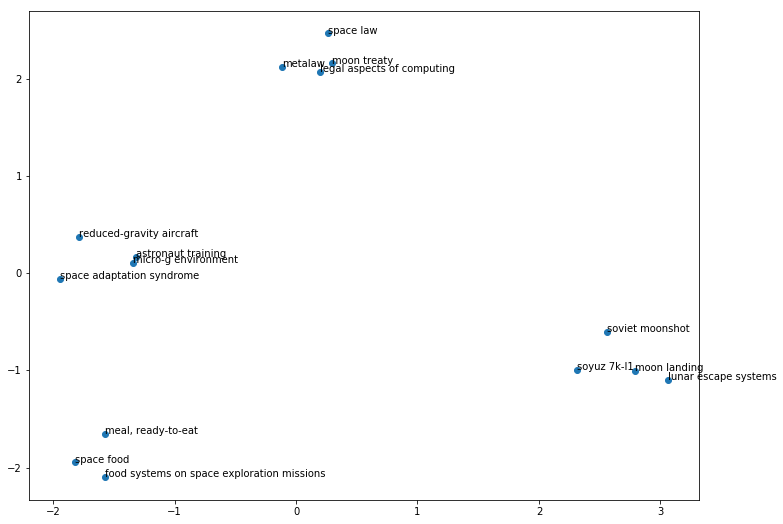

In [ ]:
plot_nodes(terms)

# Graph Based Machine Learning

Traditional Machine Learning for graphs and networks usually feature the following tasks

- node classification
- edge classification
- link prediction
- community detection
- diffusion (gossip, information, culture, disease)
- evolution and mutation of networks 

Today (as we will see in a bit), neural network inspired deep and shallow networks are the most popular methods for graph based tasks.

We recommend the following packages for Machine Learning for Graphs and Networks

- karateclub - https://karateclub.readthedocs.io/en/latest/
- StellarGraph - https://stellargraph.readthedocs.io/en/stable/

StellarGraph focuses on deep learning based algorithms, while karateclub is more suited to creating embeddings which can be used in machine learning pipelines. 

In this section, we will walk through some simple examples of community detection and machine learning on graph embeddings.

We will be using the text and code from the [introduction page](https://karateclub.readthedocs.io/en/latest/notes/introduction.html) of the KarateClub package.

In [1]:
!pip install karateclub

     |████████████████████████████████| 61kB 1.7MB/s 
     |████████████████████████████████| 1.8MB 5.8MB/s 
     |████████████████████████████████| 24.2MB 1.7MB/s 
  Created wheel for karateclub: filename=karateclub-1.0.24-cp37-none-any.whl size=94202 sha256=25747a45f02e4f30cd9b25b57e62b99fa0465ea4aa1b0a6fcaad9979c18dc115
  Stored in directory: /root/.cache/pip/wheels/ab/a4/81/a2761ff51bb1caa318e69e4a30f5d7d39c14f10efe73365279
Successfully built karateclub
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


Karate Club uses the design principles of Scikit-Learn which means that the algorithms in the package share the same API. Each machine learning model is implemented as a class which inherits from Estimator. The constructors of the models are used to set the hyperparameters. The models have default hyperparameters that work well out of the box. This means that non expert users do not have to make decisions about these in advance and only a little fine tuning is required. For each class the fit method provided learns the embedding or clustering of nodes/graphs in the NetworkX graph. This method takes the data used for learn the embedding or clustering. Models provide the additional public methods get_embedding, get_memberships, get_cluster_centers. This API driven design means that one can create a DeepWalk embedding of a Watts-Strogatz graph just like this.

In [2]:
import networkx as nx
from karateclub import DeepWalk

g = nx.newman_watts_strogatz_graph(100, 20, 0.05)

model = DeepWalk()
model.fit(g)
embedding = model.get_embedding()

This can be modified to create a Walklets embedding with minimal effort like this.



In [3]:
from karateclub.node_embedding.neighbourhood import Walklets

In [ ]:
model = Walklets()
model.fit(g)
embedding = model.get_embedding()

Looking at these two snippets the advantage of the API driven design is evident. First, one had to change the import of the model. Second, we needed to change the model construction and the default hyperparameters were already set. The public methods provided by DeepWalk and Walklets are the same. An embedding is learned with fit and it is returned by get_embedding. This allows for quick and minimal changes to the code when a model performs poorly.

### Community detection

The first machine learning task that we will do is the clustering of pages on Facebook. In this network nodes represent official verified Facebook pages and the links between them are mutual likes. The pages have categories and we will look how well the cluster and group memberships are aligned. For details about the dataset see this paper.

We first need to load the Facebook page-page network dataset. We will use the page-page graph and the page category vector. These are returned as a NetworkX graph and numpy array respectively.

In [32]:
from karateclub import GraphReader

reader = GraphReader("facebook")

graph = reader.get_graph()
target = reader.get_target()

The constructor defines the graph reader object while the methods get_graph and get_target read the data.

Now let’s use the Label Propagation community detection method from [Near Linear Time Algorithm to Detect Community Structures in Large-Scale Networks](https://arxiv.org/abs/0709.2938).



In [33]:
from karateclub import LabelPropagation

model = LabelPropagation()
model.fit(graph)
cluster_membership = model.get_memberships()

The constructor defines a model, we fit the model on the Facebook graph with the fit method and return the cluster memberships with the get_memberships method as a dictionary.

Finally we can evaluate the clustering using normalized mutual information. First we need to create an ordered list of the node memberships. We use the ground truth about the cluster memberships for calculating the normalized mutual info score (NMI).

In [34]:
from sklearn.metrics.cluster import normalized_mutual_info_score

cluster_membership = [cluster_membership[node] for node in range(len(cluster_membership))]

nmi = normalized_mutual_info_score(target, cluster_membership)


In [35]:
print('NMI: {:.4f}'.format(nmi))

NMI: 0.2634


It is worth noting that the clustering methods in Karate Club work on arbitrary NetworkX graphs that follow the dataset formatting requirements. One could simply cluster a randomly generated Watts-Strogatz graph just like this.

In [36]:
from karateclub import LabelPropagation


In [37]:
graph = nx.newman_watts_strogatz_graph(100, 20, 0.05)

In [38]:
model = LabelPropagation()
model.fit(graph)
cluster_membership = model.get_memberships()

### Node embedding for Machine Learning

The second machine learning task that we look at is the identification of users from the UK who abuse the platform on Twitch. In the social network of interest nodes represent users and the links are mutual friendships between the users. Our goal is to perform binary classification of the users (platform abusers and general good guy users). For details about the dataset see this paper.

We first need to load the Twitch UK dataset. We will use the user friendship graph and the abusive user target vector. These are returned as a NetworkX graph and numpy array respectively.

In [11]:
reader = GraphReader("twitch")

graph = reader.get_graph()
y = reader.get_target()

We fit a Diff2vec node embedding ([Fast Sequence-Based Embedding with Diffusion Graphs](https://arxiv.org/abs/2001.07463)), with a low number of dimensions, diffusions per source node, and short Euler walks. First, we use the model constructor with custom parameters. Second, we fit the model to the graph. Third, we get the node embedding which is a numpy array.


In [12]:
from karateclub import Diff2Vec

model = Diff2Vec(diffusion_number=2, diffusion_cover=20, dimensions=16)
model.fit(graph)
X = model.get_embedding()

We use the node embedding features as predictors of the abusive behaviour. So let us create a train-test split of the explanatory variables and the target variable with Scikit-Learn. We will use a test data ratio of 20%. Here it is.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using the training data (X_train and y_train) we learn a logistic regression model to predict the probability of someone being an abusive user. We perform inference on the test set for this target. Finally, we evaluate the model performance by printing an area under the ROC curve value.

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

downstream_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_hat = downstream_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_hat)

In [15]:
print('AUC: {:.4f}'.format(auc))

AUC: 0.6116


### Graph embedding and Machine Learning

The third machine learning task that we look at is the classification of threads from the online forum Reddit. The threads can be of of two types - discussion and non-discussion based ones. Our goal is to predict the type of the thread based on the topological (structural) properties of the graphs. The specific dataset that we look a 10 thousand graph subsample of the Reddit 204K dataset which contains a large number of threads from the spring of 2018. The graphs in the dataset do not have a specific feature. Because of this we use the degree centrality as a string feature. For details about the dataset see this paper.

We first need to load the Reddit 10K dataset. We will use the use the graphs and the discussion/non-discussion target vector. These are returned as a list of NetworkX graphs and numpy array respectively.

In [17]:
from karateclub.dataset import GraphSetReader

In [18]:
reader = GraphSetReader("reddit10k")

graphs = reader.get_graphs()
y = reader.get_target()

We fit a [FEATHER](https://arxiv.org/pdf/2005.07959.pdf) graph level embedding, with the standard hyperparameter settings. These are pretty widely used settings. First, we use the model constructor without custom parameters. Second, we fit the model to the graphs. Third, we get the graph embedding which is a numpy array.

In [19]:
from karateclub import FeatherGraph

model = FeatherGraph()
model.fit(graphs)
X = model.get_embedding()

We use the graph embedding features as predictors of the thread type. So let us create a train-test split of the explanatory variables and the target variable with Scikit-Learn. We will use a test data ratio of 20%. Here it is.



In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Using the training data (X_train and y_train) we learn a logistic regression model to predict the probability of a thread being discussion based. We perform inference on the test set for this target. Finally, we evaluate the model performance by printing an area under the ROC curve value.

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

downstream_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_hat = downstream_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_hat)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
print('AUC: {:.4f}'.format(auc))

AUC: 0.8182


# Deep Learning with Graphs

Early Graph Neural Networks used tree based approaches, only being able to deal with directed acyclic graphs, and soon after RNN based approaches made progress, being able to deal with cyclic scenarios. Today, the state of the art remains graph convolutional neural networks, which we will be exploring in this section.

Graph Convolutional Neural Networks capture local structure by utilizing a convolution not shaped like a tile of pixels, but the neighborhood of each node in a graph. For these models, the goal is then to learn a function of features on a graph that takes as input a feature description for every node and a description of the graph structure in matrix form; typically in the form of an adjacency matrix between nodes. Such models have become widely used for edge prediction, network partitioning and the simulation of network processes (e.g., diffusion) (Duvenaud et al. 2015).

- [Introduction to Graph Convolutional Neural Networks](http://tkipf.github.io/graph-convolutional-networks/)
- [A Gentle Introduction to Deep Learning for Graphs](https://arxiv.org/pdf/1912.12693.pdf)
- [Blog Post on Deep Learning for Graphs](https://medium.com/syncedreview/introduction-to-deep-learning-for-graphs-and-where-it-may-be-heading-75d48f42a322#:~:text=The%20deep%20learning%20for%20graphs,of%20natural%20language%20processing%20applications.)
- [Deep Learning on Graphs: a survey](https://arxiv.org/abs/1812.04202)
- [Graph neural networks: A review of methods and applications](https://arxiv.org/pdf/1812.08434.pdf)
- [A Comprehensive Survey on Graph Neural Networks](https://arxiv.org/pdf/1901.00596.pdf)

We will be using PyTorch Geometric ([code](https://github.com/rusty1s/pytorch_geometric), [documentation](https://pytorch-geometric.readthedocs.io/en/latest/)) for all of our purposes, but it is also worth checking out:


- Deep Graph Library - https://github.com/dmlc/dgl
- StellarGraph - https://github.com/stellargraph/stellargraph


Note: if you are more comfortable with PyTorch, then PyTorch geometric should be your choice - otherwise, StellarGraph has many of the algorithms implemented but using a Keras/Tensorflow setting. StellarGraph also has many intensive examples and demos for you to use.


## Using PyTorch_geometric for Deep Learning on Graphs

The following 4 examples (graph embedding, node classification, graph classification, and point cloud classification) are all taken from the PyTorch geometric docs. 


In [ ]:
# Install required packages.
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-geometric

# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt


def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

     |████████████████████████████████| 51kB 2.5MB/s 


## Introduction

Recently, deep learning on graphs has emerged to one of the hottest research fields in the deep learning community.
Here, **Graph Neural Networks (GNNs)** aim to generalize classical deep learning concepts to irregular structured data (in contrast to images or texts) and to enable neural networks to reason about objects and their relations.

This is done by following a simple **neural message passing scheme**, where node features $\mathbf{x}_v^{(\ell)}$ of all nodes $v \in \mathcal{V}$ in a graph $\mathcal{G} = (\mathcal{V}, \mathcal{E})$ are iteratively updated by aggregating localized information from their neighbors $\mathcal{N}(v)$:

$$
\mathbf{x}_v^{(\ell + 1)} = f^{(\ell + 1)}_{\theta} \left( \mathbf{x}_v^{(\ell)}, \left\{ \mathbf{x}_w^{(\ell)} : w \in \mathcal{N}(v) \right\} \right)
$$

This tutorial will introduce you to some fundamental concepts regarding deep learning on graphs via Graph Neural Networks based on the **[PyTorch Geometric (PyG) library](https://github.com/rusty1s/pytorch_geometric)**.
PyTorch Geometric is an extension library to the popular deep learning framework [PyTorch](https://pytorch.org/), and consists of various methods and utilities to ease the implementation of Graph Neural Networks.

Following [Kipf et al. (2017)](https://arxiv.org/abs/1609.02907), let's dive into the world of GNNs by looking at a simple graph-structured example, the well-known [**Zachary's karate club network**](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). This graph describes a social network of 34 members of a karate club and documents links between members who interacted outside the club. Here, we are interested in detecting communities that arise from the member's interaction.

PyTorch Geometric provides an easy access to this dataset via the [`torch_geometric.datasets`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets) subpackage:

In [ ]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


After initializing the [`KarateClub`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub) dataset, we first can inspect some of its properties.
For example, we can see that this dataset holds exactly **one graph**, and that each node in this dataset is assigned a **34-dimensional feature vector** (which uniquely describes the members of the karate club).
Furthermore, the graph holds exactly **4 classes**, which represent the community each node belongs to.

Let's now look at the underlying graph in more detail:

In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(edge_index=[2, 156], train_mask=[34], x=[34, 34], y=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


Each graph in PyTorch Geometric is represented by a single [`Data`](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data) object, which holds all the information to describe its graph representation.
We can print the data object anytime via `print(data)` to receive a short summary about its attributes and their shapes:
```
Data(edge_index=[2, 156], x=[34, 34], y=[34], train_mask=[34])
```
We can see that this `data` object holds 4 attributes:
(1) The `edge_index` property holds the information about the **graph connectivity**, *i.e.*, a tuple of source and destination node indices for each edge.
PyG further refers to (2) **node features** as `x` (each of the 34 nodes is assigned a 34-dim feature vector), and to (3) **node labels** as `y` (each node is assigned to exactly one class).
(4) There also exists an additional attribute called `train_mask`, which describes for which nodes we already know their community assigments.
In total, we are only aware of the ground-truth labels of 4 nodes (one for each community), and the task is to infer the community assignment for the remaining nodes.

The `data` object also provides some **utility functions** to infer some basic properties of the underlying graph.
For example, we can easily infer whether there exists isolated nodes in the graph (*i.e.* there exists no edge to any node), whether the graph contains self-loops (*i.e.*, $(v, v) \in \mathcal{E}$), or whether the graph is undirected (*i.e.*, for each edge $(v, w) \in \mathcal{E}$ there also exists the edge $(w, v) \in \mathcal{E}$).

Let us now inspect the `edge_index` property in more detail:

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())

<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

By printing `edge_index`, we can further understand how PyG represents graph connectivity internally.
We can see that for each edge, `edge_index` holds a tuple of two node indices, where the first value describes the node index of the source node and the second value describes the node index of the destination node of an edge.

This representation is known as the **COO format (coordinate format)** commonly used for representing sparse matrices.
Instead of holding the adjacency information in a dense representation $\mathbf{A} \in \{ 0, 1 \}^{|\mathcal{V}| \times |\mathcal{V}|}$, PyG represents graphs sparsely, which refers to only holding the coordinates/values for which entries in $\mathbf{A}$ are non-zero.

We can further visualize the graph by converting it to the `networkx` library format, which implements, in addition to graph manipulation functionalities, powerful tools for visualization:

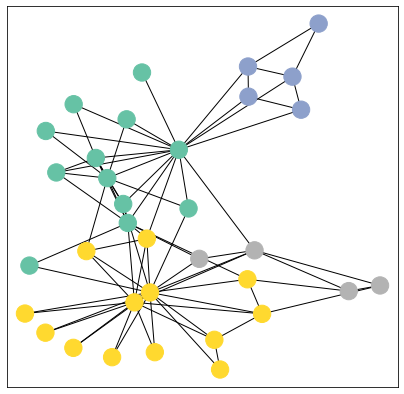

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

## Implementing Graph Neural Networks

Ater learning about PyG's data handling, it's time to implement our first Graph Neural Network!

For this, we will use on of the most simple GNN operators, the **GCN layer** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)), which is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \sum_{w \in \mathcal{N}(v) \, \cup \, \{ v \}} \frac{1}{c_{w,v}} \cdot \mathbf{x}_w^{(\ell)}
$$

where $\mathbf{W}^{(\ell + 1)}$ denotes a trainable weight matrix of shape `[num_output_features, num_input_features]` and $c_{w,v}$ refers to a fixed normalization coefficient for each edge.

PyG implements this layer via [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv), which can be executed by passing in the node feature representation `x` and the COO graph connectivity representation `edge_index`.

With this, we are ready to create our first Graph Neural Network by defining our network architecture in a `torch.nn.Module` class:

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


Here, we first initialize all of our building blocks in `__init__` and define the computation flow of our network in `forward`.
We first define and stack **three graph convolution layers**, which corresponds to aggregating 3-hop neighborhood information around each node (all nodes up to 3 "hops" away).
In addition, the `GCNConv` layers reduce the node feature dimensionality to $2$, *i.e.*, $34 \rightarrow 4 \rightarrow 4 \rightarrow 2$. Each `GCNConv` layer is enhanced by a [tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html?highlight=tanh#torch.nn.Tanh) non-linearity.

After that, we apply a single linear transformation ([`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear)) that acts as a classifier to map our nodes to 1 out of the 4 classes/communities.

We return both the output of the final classifier as well as the final node embeddings produced by our GNN.
We proceed to initialize our final model via `GCN()`, and printing our model produces a summary of all its used sub-modules.


### Embedding the Karate Club Network

Let's take a look at the node embeddings produced by our GNN.
Here, we pass in the initial node features `x` and the graph connectivity information `edge_index` to the model, and visualize its 2-dimensional embedding.

Embedding shape: [34, 2]


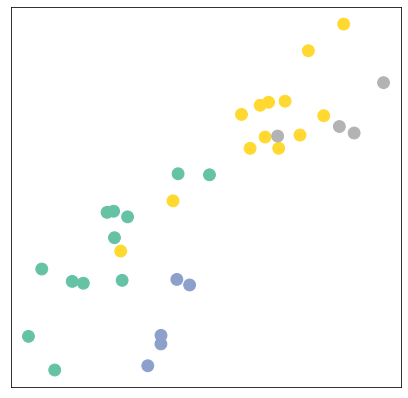

In [ ]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

Remarkably, even before training the weights of our model, the model produces an embedding of nodes that closely resembles the community-structure of the graph.
Nodes of the same color (community) are already closely clustered together in the embedding space, although the weights of our model are initialized **completely at random** and we have not yet performed any training so far!
This leads to the conclusion that GNNs introduce a strong inductive bias, leading to similar embeddings for nodes that are close to each other in the input graph.

### Training on the Karate Club Network

But can we do better? Let's look at an example on how to train our network parameters based on the knowledge of the community assignments of 4 nodes in the graph (one for each community):

Since everything in our model is differentiable and parameterized, we can add some labels, train the model and observse how the embeddings react.
Here, we make use of a semi-supervised or transductive learning procedure: We simply train against one node per class, but are allowed to make use of the complete input graph data.

Training our model is very similar to any other PyTorch model.
In addition to defining our network architecture, we define a loss critertion (here, [`CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)) and initialize a stochastic gradient optimizer (here, [`Adam`](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam)).
After that, we perform multiple rounds of optimization, where each round consists of a forward and backward pass to compute the gradients of our model parameters w.r.t. to the loss derived from the forward pass.
If you are not new to PyTorch, this scheme should appear familar to you. 
Otherwise, the PyTorch docs provide [a good introduction on how to train a neural network in PyTorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-loss-function-and-optimizer).

Note that our semi-supervised learning scenario is achieved by the following line:
```
loss = criterion(out[data.train_mask], data.y[data.train_mask])
```
While we compute node embeddings for all of our nodes, we **only make use of the training nodes for computing the loss**.
Here, this is implemented by filtering the output of the classifier `out` and ground-truth labels `data.y` to only contain the nodes in the `train_mask`.

Let us now start training and see how our node embeddings evolve over time (best experienced by explicitely running the code):

<IPython.core.display.Javascript object>

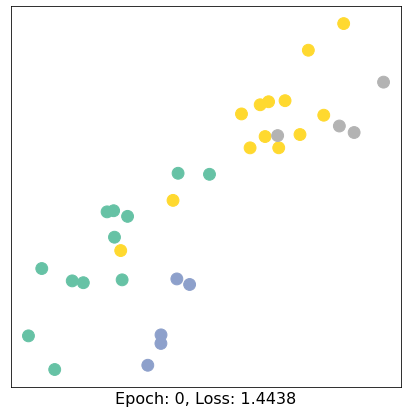

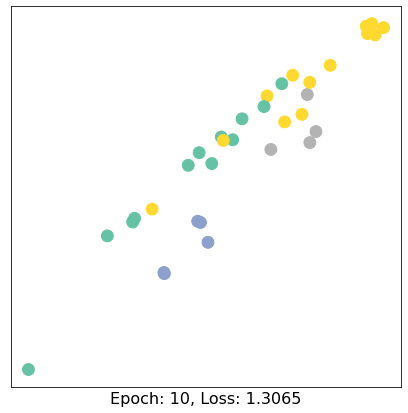

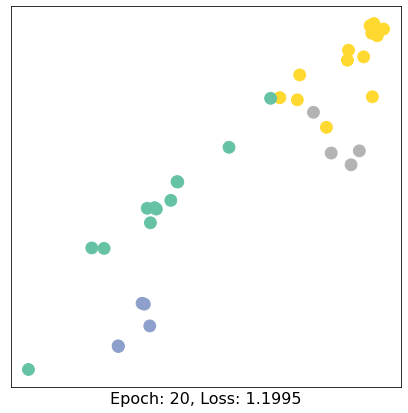

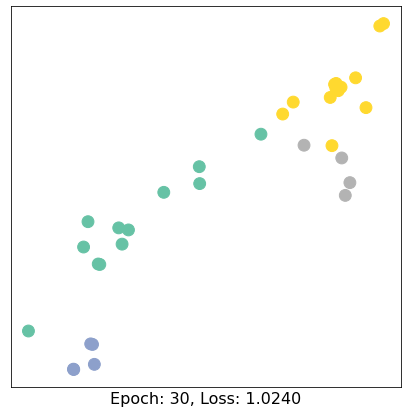

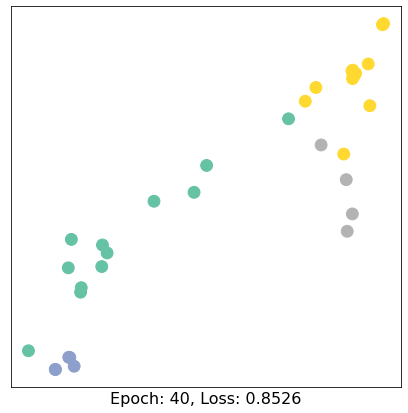

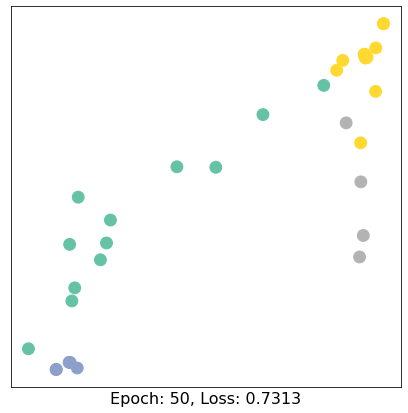

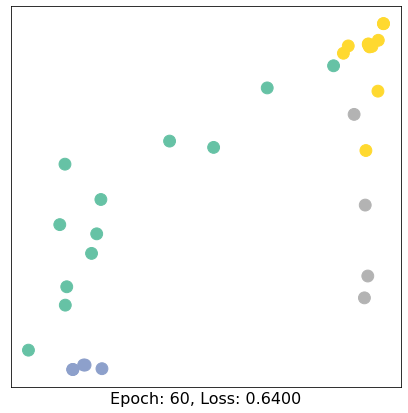

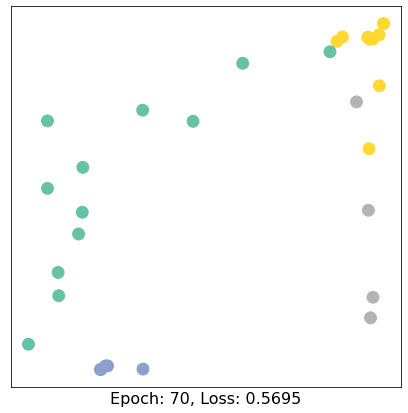

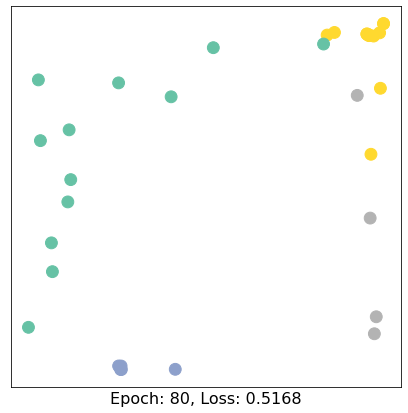

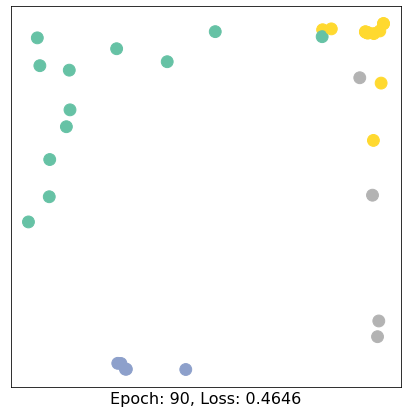

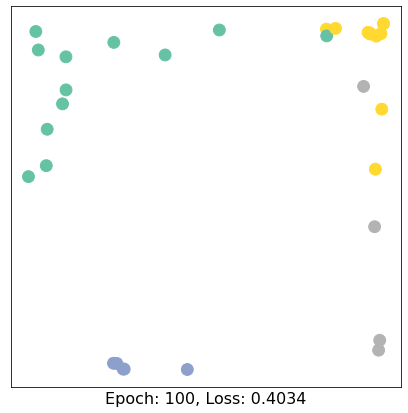

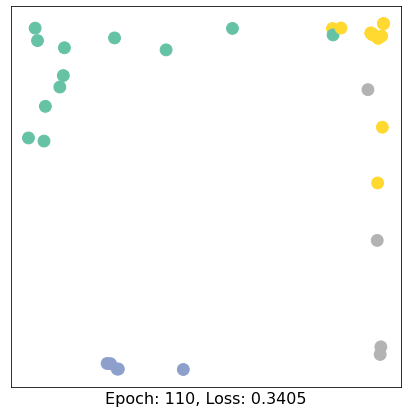

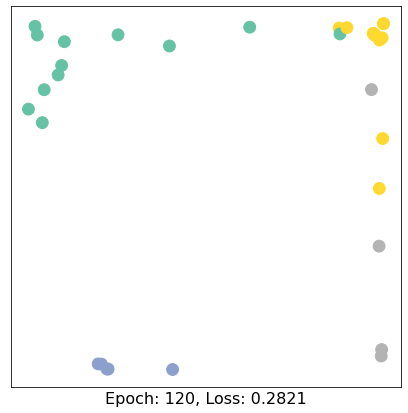

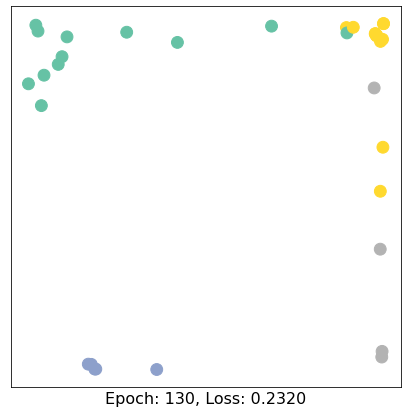

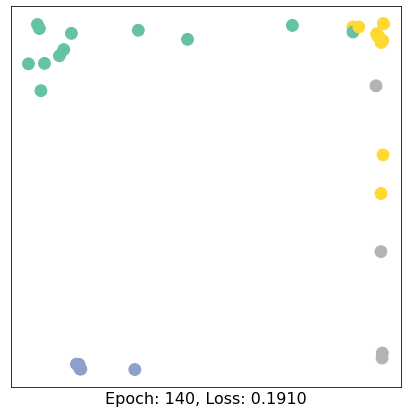

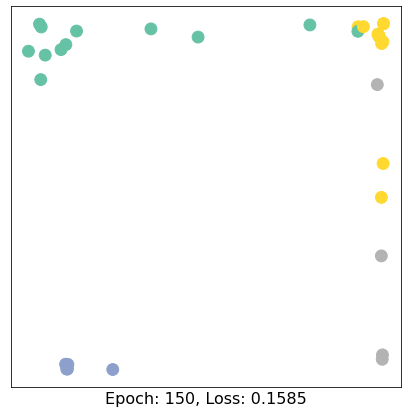

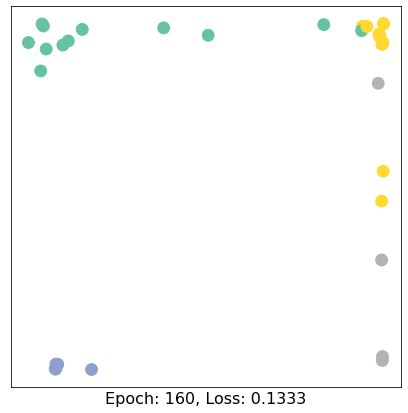

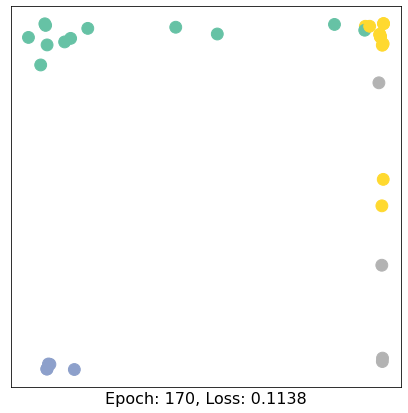

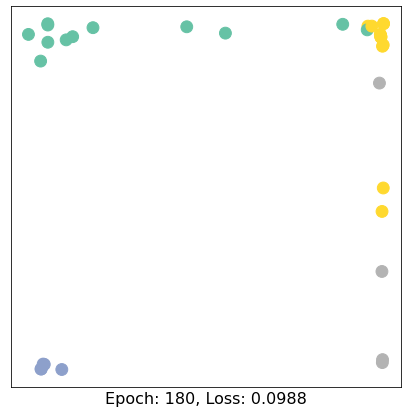

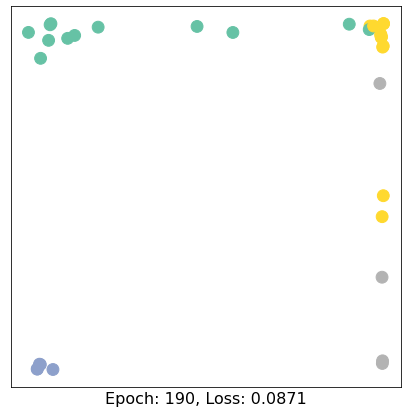

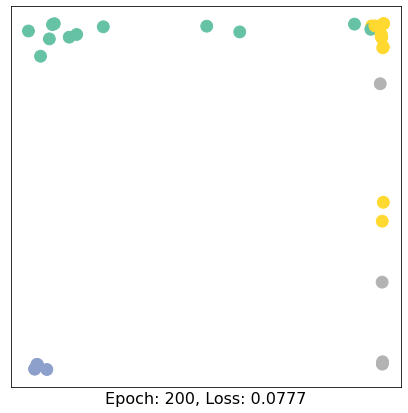

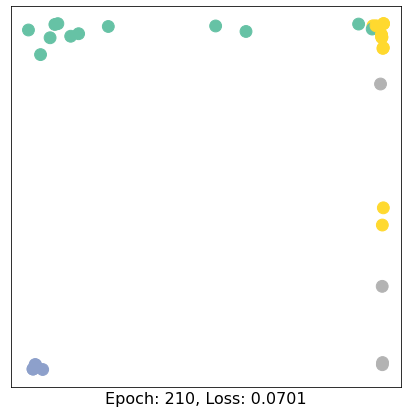

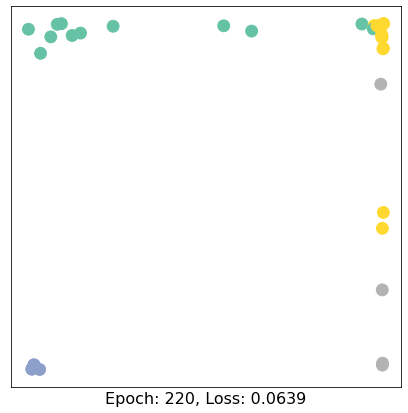

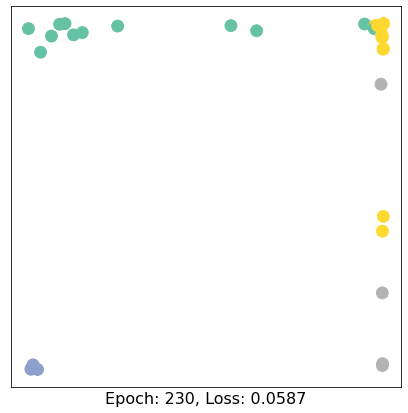

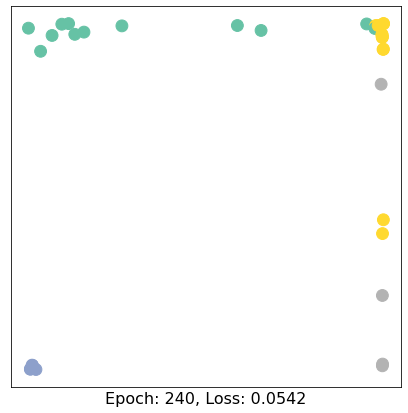

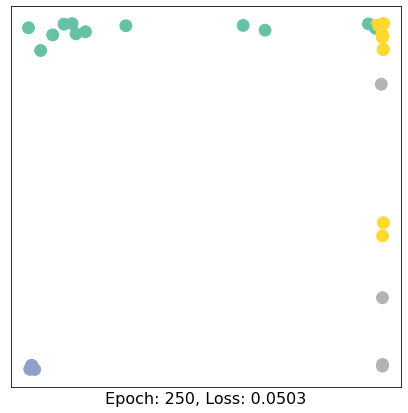

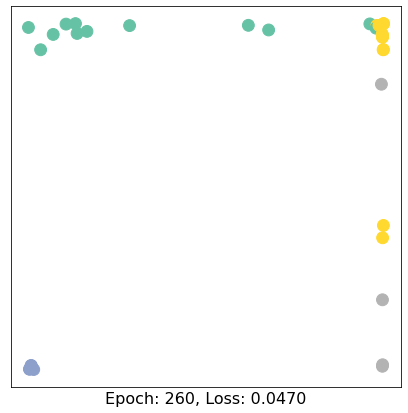

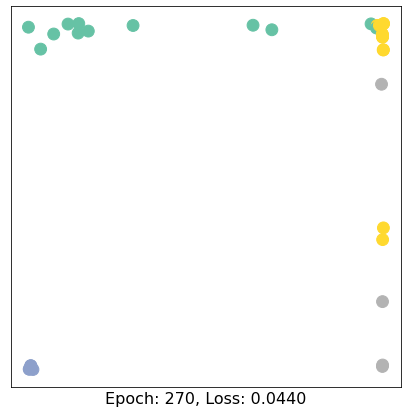

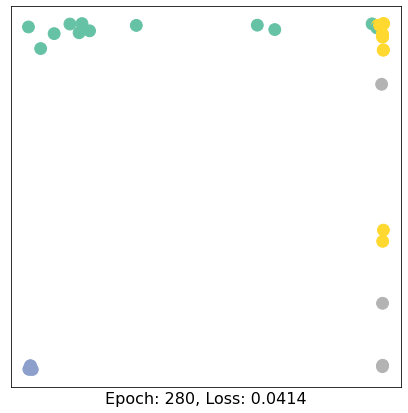

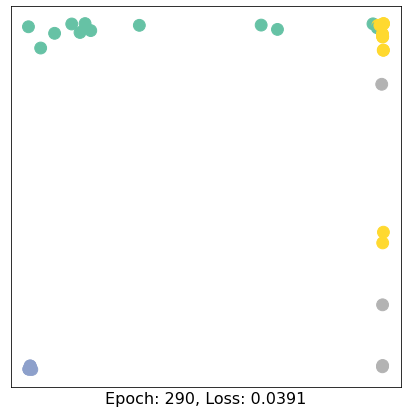

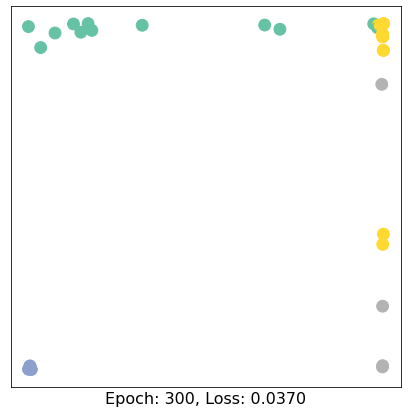

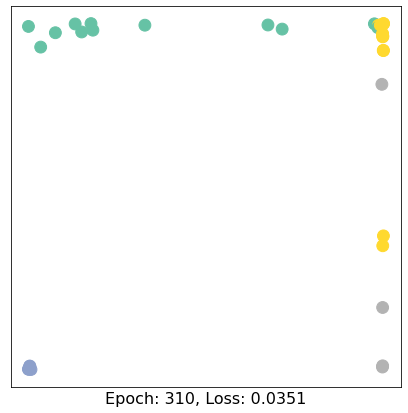

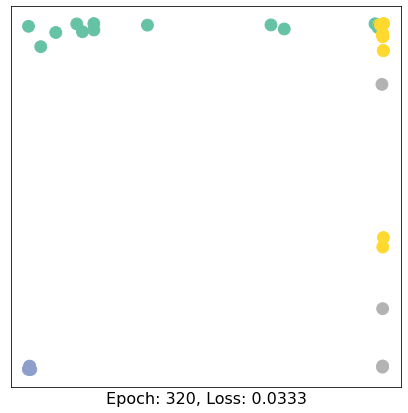

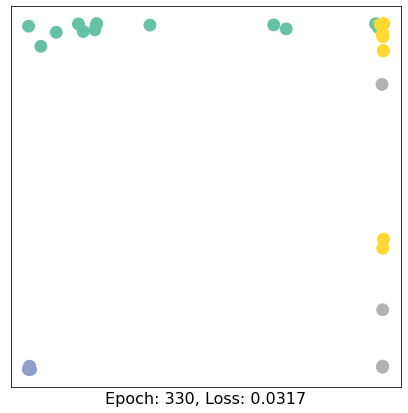

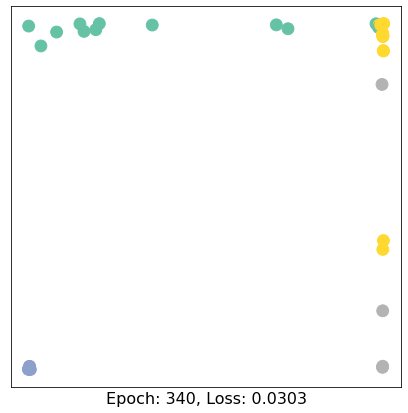

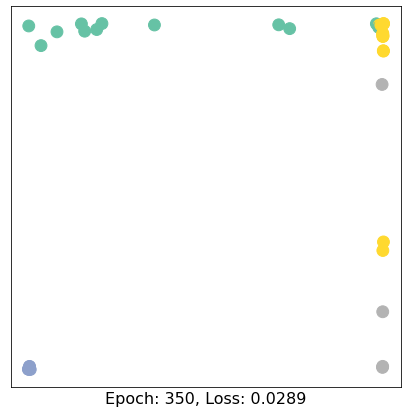

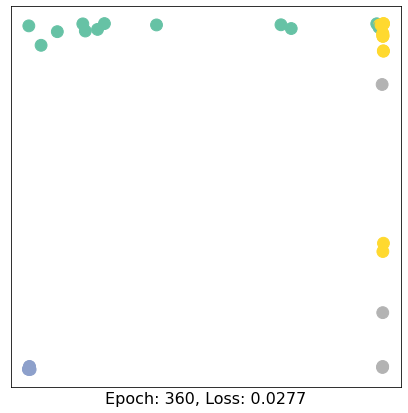

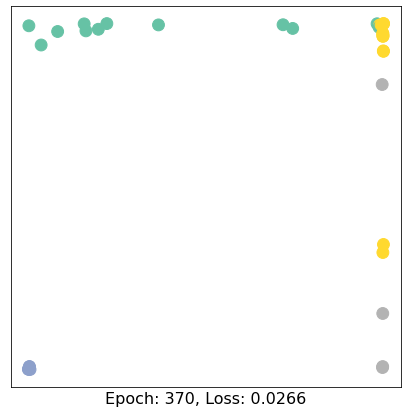

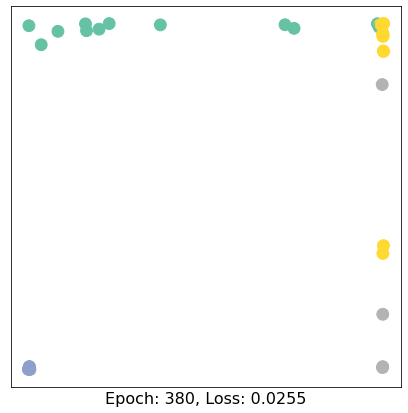

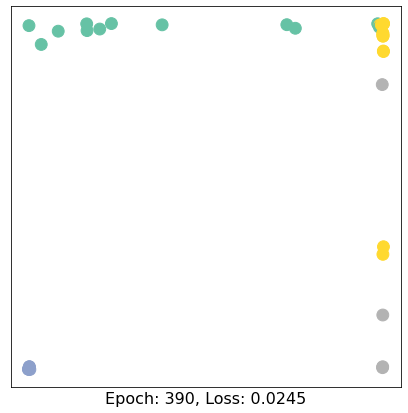

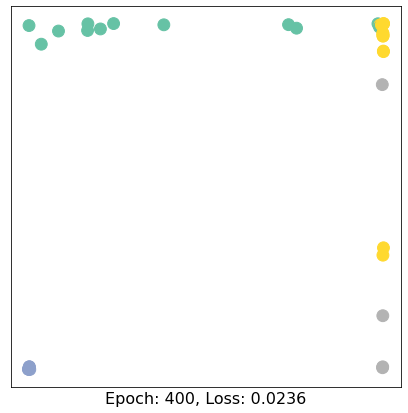

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

for epoch in range(401):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

As one can see, our 3-layer GCN model manages to linearly separating the communities and classifying most of the nodes correctly.

Furthermore, we did this all with a few lines of code, thanks to the PyTorch Geometric library which helped us out with data handling and GNN implementations.

## Conclusion

This concludes the first introduction into the world of GNNs and PyTorch Geometric.
In the follow-up sessions, you will learn how to achieve state-of-the-art classification results on a number of real-world graph datasets.

[Next: Node Classification with Graph Neural Networks](https://colab.research.google.com/drive/14OvFnAXggxB8vM4e8vSURUp1TaKnovzX)


## Node Classification with Graph Neural Networks

[Previous: Introduction: Hands-on Graph Neural Networks](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8)

This tutorial will teach you how to apply **Graph Neural Networks (GNNs) to the task of node classification**.
Here, we are given the ground-truth labels of only a small subset of nodes, and want to infer the labels for all the remaining nodes (*transductive learning*).

To demonstrate, we make use of the `Cora` dataset, which is a **citation network** where nodes represent documents.
Each node is described by a 1433-dimensional bag-of-words feature vector.
Two documents are connected if there exists a citation link between them.
The task is to infer the category of each document (7 in total).

This dataset was first introduced by [Yang et al. (2016)](https://arxiv.org/abs/1603.08861) as one of the datasets of the `Planetoid` benchmark suite.
We again can make use [PyTorch Geometric](https://github.com/rusty1s/pytorch_geometric) for an easy access to this dataset via [`torch_geometric.datasets.Planetoid`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.Planetoid):

In [ ]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

print()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('===========================================================================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7

Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


Overall, this dataset is quite similar to the previously used [`KarateClub`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub) network.
We can see that the `Cora` network holds 2,708 nodes and 10,556 edges, resulting in an average node degree of 3.9.
For training this dataset, we are given the ground-truth categories of 140 nodes (20 for each class).
This results in a training node label rate of only 5%.

In contrast to `KarateClub`, this graph holds the additional attributes `val_mask` and `test_mask`, which denotes which nodes should be used for validation and testing.
Furthermore, we make use of **[data transformations](https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html#data-transforms) via `transform=NormalizeFeatures()`**.
Transforms can be used to modify your input data before inputting them into a neural network, *e.g.*, for normalization or data augmentation.
Here, we [row-normalize](https://pytorch-geometric.readthedocs.io/en/latest/modules/transforms.html#torch_geometric.transforms.NormalizeFeatures) the bag-of-words input feature vectors.

We can further see that this network is undirected, and that there exists no isolated nodes (each document has at least one citation).

### Training a Multi-layer Perception Network (MLP)

In theory, we should be able to infer the category of a document solely based on its content, *i.e.* its bag-of-words feature representation, without taking any relational information into account.

Let's verify that by constructing a simple MLP that solely operates on input node features (using shared weights across all nodes):

In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(MLP, self).__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(dataset.num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=16)
print(model)

MLP(
  (lin1): Linear(in_features=1433, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=7, bias=True)
)


Our MLP is defined by two linear layers and enhanced by [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html?highlight=relu#torch.nn.ReLU) non-linearity and [dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html?highlight=dropout#torch.nn.Dropout).
Here, we first reduce the 1433-dimensional feature vector to a low-dimensional embedding (`hidden_channels=16`), while the second linear layer acts as a classifier that should map each low-dimensional node embedding to one of the 7 classes.

Let's train our simple MLP by following a similar procedure as described in [the first part of this tutorial](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8).
We again make use of the **cross entropy loss** and **Adam optimizer**.
This time, we also define a **`test` function** to evaluate how well our final model performs on the test node set (which labels have not been observed during training).

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = MLP(hidden_channels=16)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9615
Epoch: 002, Loss: 1.9557
Epoch: 003, Loss: 1.9505
Epoch: 004, Loss: 1.9423
Epoch: 005, Loss: 1.9327
Epoch: 006, Loss: 1.9279
Epoch: 007, Loss: 1.9144
Epoch: 008, Loss: 1.9087
Epoch: 009, Loss: 1.9023
Epoch: 010, Loss: 1.8893
Epoch: 011, Loss: 1.8776
Epoch: 012, Loss: 1.8594
Epoch: 013, Loss: 1.8457
Epoch: 014, Loss: 1.8365
Epoch: 015, Loss: 1.8280
Epoch: 016, Loss: 1.7965
Epoch: 017, Loss: 1.7984
Epoch: 018, Loss: 1.7832
Epoch: 019, Loss: 1.7495
Epoch: 020, Loss: 1.7441
Epoch: 021, Loss: 1.7188
Epoch: 022, Loss: 1.7124
Epoch: 023, Loss: 1.6785
Epoch: 024, Loss: 1.6660
Epoch: 025, Loss: 1.6119
Epoch: 026, Loss: 1.6236
Epoch: 027, Loss: 1.5827
Epoch: 028, Loss: 1.5784
Epoch: 029, Loss: 1.5524
Epoch: 030, Loss: 1.5020
Epoch: 031, Loss: 1.5065
Epoch: 032, Loss: 1.4742
Epoch: 033, Loss: 1.4581
Epoch: 034, Loss: 1.4246
Epoch: 035, Loss: 1.4131
Epoch: 036, Loss: 1.4112
Epoch: 037, Loss: 1.3923
Epoch: 038, Loss: 1.3055
Epoch: 039, Loss: 1.2982
Epoch: 040, Loss: 1.2543


After training the model, we can call the `test` function to see how well our model performs on unseen labels.
Here, we are interested in the accuracy of the model, *i.e.*, the ratio of correctly classified nodes:

In [ ]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.5900


As one can see, our MLP performs rather bad with only about 59% test accuracy.
But why does the MLP do not perform better?
The main reason for that is that this model suffers from heavy overfitting due to only a **small amount of training nodes**, and therefore generalizes poorly to unseen node representations.

It also fails to incorporate an important bias into the model: **Cited papers are very likely related to the category of a document**.
That is exactly where Graph Neural Networks come into play and can help to boost the performance of our model.



### Training a Graph Neural Network (GNN)

We can easily convert our MLP to a GNN by swapping the `torch.nn.Linear` layers with PyG's GNN operators.

Following-up on [the first part of this tutorial](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8), we replace the linear layers by the [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv) module.
To recap, the **GCN layer** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)) is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \sum_{w \in \mathcal{N}(v) \, \cup \, \{ v \}} \frac{1}{c_{w,v}} \cdot \mathbf{x}_w^{(\ell)}
$$

where $\mathbf{W}^{(\ell + 1)}$ denotes a trainable weight matrix of shape `[num_output_features, num_input_features]` and $c_{w,v}$ refers to a fixed normalization coefficient for each edge.
In contrast, a single linear layer is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \mathbf{x}_v^{(\ell)}
$$

which does not make use of neighboring node information.

In [ ]:
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(hidden_channels=16)
print(model)

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


Let's visualize the node embeddings of our **untrained** GCN network.
For visualization, we make use of [**TSNE**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to embed our 7-dimensional node embeddings onto a 2D plane.

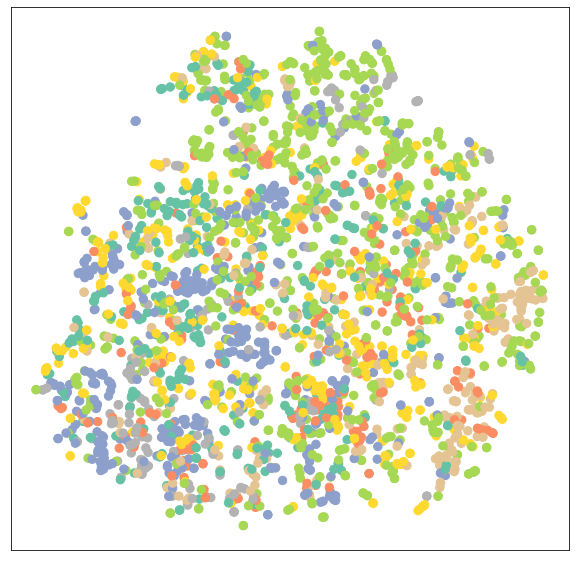

In [ ]:
model = GCN(hidden_channels=16)
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

As one can see, there is at least *some kind* of clustering (*e.g.*, for the "blue" nodes), but we certainly can do better by training our model.
The training and testing procedure is once again the same, but this time we make use of the node features `x` **and** the graph connectivity `edge_index` as input to our GCN model.

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc


for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9451
Epoch: 002, Loss: 1.9384
Epoch: 003, Loss: 1.9307
Epoch: 004, Loss: 1.9227
Epoch: 005, Loss: 1.9126
Epoch: 006, Loss: 1.9076
Epoch: 007, Loss: 1.8917
Epoch: 008, Loss: 1.8809
Epoch: 009, Loss: 1.8728
Epoch: 010, Loss: 1.8616
Epoch: 011, Loss: 1.8453
Epoch: 012, Loss: 1.8397
Epoch: 013, Loss: 1.8237
Epoch: 014, Loss: 1.8057
Epoch: 015, Loss: 1.7979
Epoch: 016, Loss: 1.7808
Epoch: 017, Loss: 1.7667
Epoch: 018, Loss: 1.7555
Epoch: 019, Loss: 1.7436
Epoch: 020, Loss: 1.7184
Epoch: 021, Loss: 1.7126
Epoch: 022, Loss: 1.6845
Epoch: 023, Loss: 1.6717
Epoch: 024, Loss: 1.6673
Epoch: 025, Loss: 1.6353
Epoch: 026, Loss: 1.6181
Epoch: 027, Loss: 1.5962
Epoch: 028, Loss: 1.5723
Epoch: 029, Loss: 1.5708
Epoch: 030, Loss: 1.5370
Epoch: 031, Loss: 1.5162
Epoch: 032, Loss: 1.4948
Epoch: 033, Loss: 1.4713
Epoch: 034, Loss: 1.4589
Epoch: 035, Loss: 1.4479
Epoch: 036, Loss: 1.4377
Epoch: 037, Loss: 1.4271
Epoch: 038, Loss: 1.3644
Epoch: 039, Loss: 1.3658
Epoch: 040, Loss: 1.3363


After training the model, we can check its test accuracy:

In [ ]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.8140


**There it is!**
By simply swapping the linear layers with GNN layers, we can reach **81.4% of test accuracy**!
This is in stark contrast to the 59% of test accuracy obtained by our MLP, indicating that relational information plays a crucial role in obtaining better performance.

We can also verify that once again by looking at the output embeddings of our **trained** model, which now produces a far better clustering of nodes of the same category.

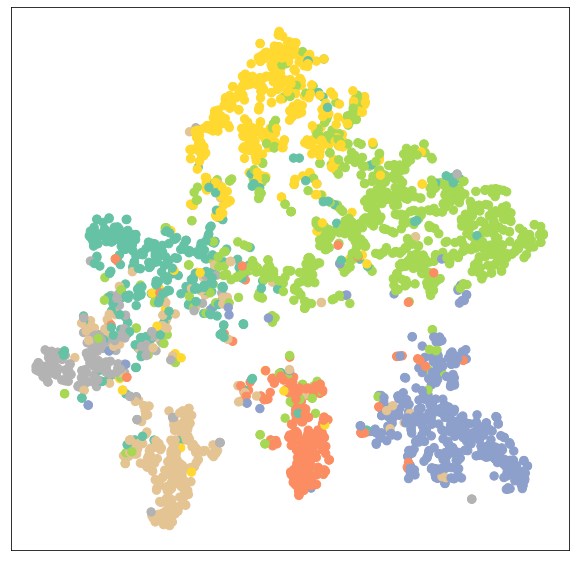

In [ ]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

## Conclusion

In this chapter, you have seen how to apply GNNs to real-world problems, and, in particular, how they can effectively be used for boosting a model's performance.
In the next section, we will look into how GNNs can be used for the task of graph classification.

[Next: Graph Classification with Graph Neural Networks](https://colab.research.google.com/drive/1I8a0DfQ3fI7Njc62__mVXUlcAleUclnb)

## Graph Classification with Graph Neural Networks

In this tutorial session we will have a closer look at how to apply **Graph Neural Networks (GNNs) to the task of graph classification**.
Graph classification refers to the problem of classifiying entire graphs (in contrast to nodes), given a **dataset of graphs**, based on some structural graph properties.
Here, we want to embed entire graphs, and we want to embed those graphs in such a way so that they are linearly separable given a task at hand.

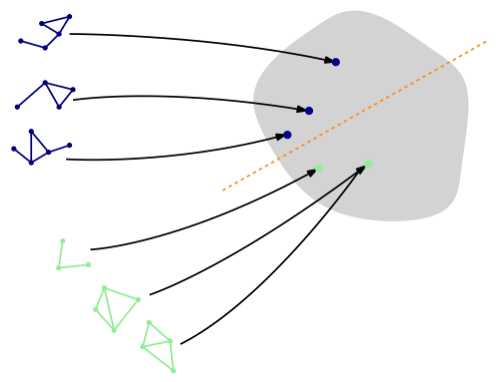

The most common task for graph classification is **molecular property prediction**, in which molecules are represented as graphs, and the task may be to infer whether a molecule inhibits HIV virus replication or not.

The TU Dortmund University has collected a wide range of different graph classification datasets, known as the [**TUDatasets**](https://chrsmrrs.github.io/datasets/), which are also accessible via [`torch_geometric.datasets.TUDataset`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.TUDataset) in PyTorch Geometric.
Let's load and inspect one of the smaller ones, the **MUTAG dataset**:

In [ ]:
import torch
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='data/TUDataset', name='MUTAG')

print()
print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Dataset: MUTAG(188):
Number of graphs: 188
Number of features: 7
Number of classes: 2

Data(edge_attr=[38, 4], edge_index=[2, 38], x=[17, 7], y=[1])
Number of nodes: 17
Number of edges: 38
Average node degree: 2.24
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


This dataset provides **188 different graphs**, and the task is to classify each graph into **one out of two classes**.

By inspecting the first graph object of the dataset, we can see that it comes with **17 nodes (with 7-dimensional feature vectors)** and **38 edges** (leading to an average node degree of 2.24).
It also comes with exactly **one graph label** (`y=[1]`), and, in addition to previous datasets, provides addtional **4-dimensional edge features** (`edge_attr=[38, 4]`).
However, for the sake of simplicity, we will not make use of those.

PyTorch Geometric provides some useful utilities for working with graph datasets, *e.g.*, we can shuffle the dataset and use the first 150 graphs as training graphs, while using the remaining ones for testing:

In [ ]:
torch.manual_seed(12345)
dataset = dataset.shuffle()

train_dataset = dataset[:150]
test_dataset = dataset[150:]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 150
Number of test graphs: 38


### Mini-batching of graphs

Since graphs in graph classification datasets are usually small, a good idea is to **batch the graphs** before inputting them into a Graph Neural Network to guarantee full GPU utilization.
In the image or language domain, this procedure is typically achieved by **rescaling** or **padding** each example into a set of equally-sized shapes, and examples are then grouped in an additional dimension.
The length of this dimension is then equal to the number of examples grouped in a mini-batch and is typically referred to as the `batch_size`.

However, for GNNs the two approaches described above are either not feasible or may result in a lot of unnecessary memory consumption.
Therefore, PyTorch Geometric opts for another approach to achieve parallelization across a number of examples. Here, adjacency matrices are stacked in a diagonal fashion (creating a giant graph that holds multiple isolated subgraphs), and node and target features are simply concatenated in the node dimension:

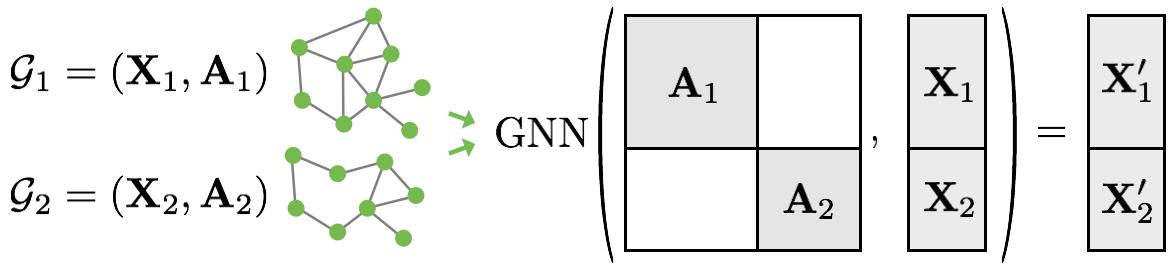

This procedure has some crucial advantages over other batching procedures:

1. GNN operators that rely on a message passing scheme do not need to be modified since messages are not exchanged between two nodes that belong to different graphs.

2. There is no computational or memory overhead since adjacency matrices are saved in a sparse fashion holding only non-zero entries, *i.e.*, the edges.

PyTorch Geometric automatically takes care of **batching multiple graphs into a single giant graph** with the help of the [`torch_geometric.data.DataLoader`](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.DataLoader) class:

In [ ]:
from torch_geometric.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Step 1:
Number of graphs in the current batch: 64
Batch(batch=[1169], edge_attr=[2592, 4], edge_index=[2, 2592], x=[1169, 7], y=[64])

Step 2:
Number of graphs in the current batch: 64
Batch(batch=[1116], edge_attr=[2444, 4], edge_index=[2, 2444], x=[1116, 7], y=[64])

Step 3:
Number of graphs in the current batch: 22
Batch(batch=[429], edge_attr=[958, 4], edge_index=[2, 958], x=[429, 7], y=[22])



Here, we opt for a `batch_size` of 64, leading to 3 (randomly shuffled) mini-batches, containing all $2 \cdot 64+22 = 150$ graphs.

Furthermore, each `Batch` object is equipped with a **`batch` vector**, which maps each node to its respective graph in the batch:

$$
\textrm{batch} = [ 0, \ldots, 0, 1, \ldots, 1, 2, \ldots ]
$$

### Training a Graph Neural Network (GNN)

Training a GNN for graph classification usually follows a simple recipe:

1. Embed each node by performing multiple rounds of message passing
2. Aggregate node embeddings into a unified graph embedding (**readout layer**)
3. Train a final classifier on the graph embedding

There exists multiple **readout layers** in literature, but the most common one is to simply take the average of node embeddings:

$$
\mathbf{x}_{\mathcal{G}} = \frac{1}{|\mathcal{V}|} \sum_{v \in \mathcal{V}} \mathcal{x}^{(L)}_v
$$

PyTorch Geometric provides this functionality via [`torch_geometric.nn.global_mean_pool`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.glob.global_mean_pool), which takes in the node embeddings of all nodes in the mini-batch and the assignment vector `batch` to compute a graph embedding of size `[batch_size, hidden_channels]` for each graph in the batch.

The final architecture for applying GNNs to the task of graph classification then looks as follows and allows for complete end-to-end training:

In [ ]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        
        return x

model = GCN(hidden_channels=64)
print(model)

GCN(
  (conv1): GCNConv(7, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)


Here, we again make use of the [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv) with $\mathrm{ReLU}(x) = \max(x, 0)$ activation for obtaining localized node embeddings, before we apply our final classifier on top of a graph readout layer.

Let's train our network for a few epochs to see how well it performs on the training as well as test set:

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
         out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
         loss = criterion(out, data.y)  # Compute the loss.
         loss.backward()  # Derive gradients.
         optimizer.step()  # Update parameters based on gradients.
         optimizer.zero_grad()  # Clear gradients.

def test(loader):
     model.eval()

     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data.x, data.edge_index, data.batch)  
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
     return correct / len(loader.dataset)  # Derive ratio of correct predictions.


for epoch in range(1, 201):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 002, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 003, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 004, Train Acc: 0.6533, Test Acc: 0.7368
Epoch: 005, Train Acc: 0.6667, Test Acc: 0.7632
Epoch: 006, Train Acc: 0.7267, Test Acc: 0.8158
Epoch: 007, Train Acc: 0.7200, Test Acc: 0.7632
Epoch: 008, Train Acc: 0.7133, Test Acc: 0.7632
Epoch: 009, Train Acc: 0.7200, Test Acc: 0.8158
Epoch: 010, Train Acc: 0.7133, Test Acc: 0.7895
Epoch: 011, Train Acc: 0.7267, Test Acc: 0.7632
Epoch: 012, Train Acc: 0.7200, Test Acc: 0.7895
Epoch: 013, Train Acc: 0.7133, Test Acc: 0.8158
Epoch: 014, Train Acc: 0.7400, Test Acc: 0.7632
Epoch: 015, Train Acc: 0.7533, Test Acc: 0.7368
Epoch: 016, Train Acc: 0.7533, Test Acc: 0.7368
Epoch: 017, Train Acc: 0.7267, Test Acc: 0.7895
Epoch: 018, Train Acc: 0.7267, Test Acc: 0.7895
Epoch: 019, Train Acc: 0.7267, Test Acc: 0.7895
Epoch: 020, Train Acc: 0.7333, Test Acc: 0.7632
Epoch: 021, Train Acc: 0.7400, Test Acc:

As one can see, our model reaches around **76% test accuracy**.
Reasons for the fluctations in accuracy can be explained by the rather small dataset (only 38 test graphs), and usually disappear once one applies GNNs to larger datasets.



### (Optional) Exercise

Can we do better than this?
As multiple papers pointed out ([Xu et al. (2018)](https://arxiv.org/abs/1810.00826), [Morris et al. (2018)](https://arxiv.org/abs/1810.02244)), applying **neighborhood normalization decreases the expressivity of GNNs in distinguishing certain graph structures**.
An alternative formulation ([Morris et al. (2018)](https://arxiv.org/abs/1810.02244)) omits neighborhood normalization completely and adds a simple skip-connection to the GNN layer in order to preserve central node information:

$$
\mathbf{x}_v^{(\ell+1)} = \mathbf{W}^{(\ell + 1)}_1 \mathbf{x}_v^{(\ell)} + \mathbf{W}^{(\ell + 1)}_2 \sum_{w \in \mathcal{N}(v)} \mathbf{x}_w^{(\ell)}
$$

This layer is implemented under the name [`GraphConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GraphConv) in PyTorch Geometric.

As an exercise, you are invited to complete the following code to the extent that it makes use of PyG's `GraphConv` rather than `GCNConv`.
This should bring you close to **82% test accuracy**.

In [ ]:
from torch_geometric.nn import GraphConv


class GNN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GNN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = ...  # TODO
        self.conv2 = ...  # TODO
        self.conv3 = ...  # TODO
        self.lin = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)

        x = global_mean_pool(x, batch)

        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        
        return x

model = GNN(hidden_channels=64)
print(model)

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GNN(hidden_channels=64)
print(model)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(1, 201):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

### Conclusion

In this chapter, you have learned how to apply GNNs to the task of graph classification.
You have learned how graphs can be batched together for better GPU utilization, and how to apply readout layers for obtaining graph embeddings rather than node embeddings.

## Point Cloud Classification with Graph Neural Networks

In this tutorial, you will learn the basic tools for **point cloud classification with Graph Neural Networks**.
Here, we are given a dataset of objects or point sets, and we want to embed those objects in such a way so that they are linearly separable given a task at hand.
Specifially, the raw point cloud is used as input into a neural network and will learn to capture meaningful local structures in order to classify the entire point set.

Let's dive in by looking at a simple toy dataset provided by [PyTorch Geometric](https://github.com/rusty1s/pytorch_geometric), the **[`GeoemtricShapes`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.GeometricShapes) dataset**.


### Data Handling

The `GeometricShapes` dataset contains 40 different 2D and 3D geometric shapes such as cubes, spheres and pyramids.
There exists two different versions of each shape, and one is used for training the neural network and the other is used to evaluate its performance.

GeometricShapes(40)
Data(face=[3, 30], pos=[32, 3], y=[1])


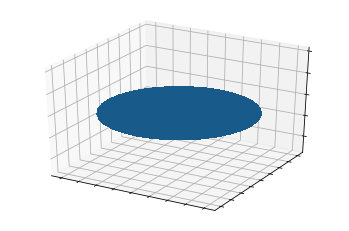

Data(face=[3, 2], pos=[4, 3], y=[1])


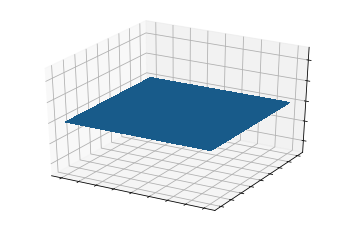

In [ ]:
from torch_geometric.datasets import GeometricShapes

dataset = GeometricShapes(root='data/GeometricShapes')
print(dataset)

data = dataset[0]
print(data)
visualize_mesh(data.pos, data.face)

data = dataset[4]
print(data)
visualize_mesh(data.pos, data.face)

We can easily import and instantiate the `GeometricShapes` dataset via PyTorch Geometric, and print out some information, *e.g.*, the description of the dataset or some information about the attributes present inside a single example.
In particular, each object is represented as a **mesh**, holding information about the vertices in `pos` and the triangular connectivity of vertices in `face` (with shape `[3, num_faces]`).

### Point Cloud Generation

Since we are interested in point cloud classification, we can transform our meshes into points via the usage of "transforms".
Here, PyTorch Geometric provides the [`torch_geometric.transforms.SamplePoints`](https://pytorch-geometric.readthedocs.io/en/latest/modules/transforms.html#torch_geometric.transforms.SamplePoints) transformation, which will uniformly sample a fixed number of points on the mesh faces according to their face area.

We can add this transformation to the dataset by simply setting it via `dataset.transform = SamplePoints(num=...)`.
Each time an example is accessed from the dataset, the transformation procedure will get called: 

Data(pos=[256, 3], y=[1])


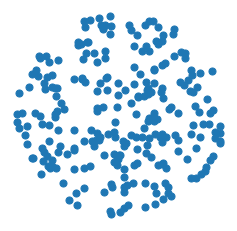

Data(pos=[256, 3], y=[1])


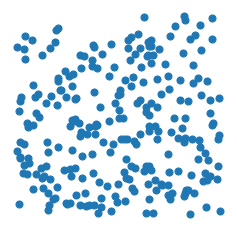

In [ ]:
import torch
from torch_geometric.transforms import SamplePoints

torch.manual_seed(42)

dataset.transform = SamplePoints(num=256)

data = dataset[0]
print(data)
visualize_points(data.pos, data.edge_index)

data = dataset[4]
print(data)
visualize_points(data.pos)

### PointNet++

Since we now have a point cloud dataset ready to use, let's look into how we can process it via Graph Neural Networks and the help of the PyTorch Geometric library.

Here, we will re-implement the **[PointNet++](https://arxiv.org/abs/1706.02413) architecture**, a pioneering work towards point cloud classification/segmentation via Graph Neural Networks.

PointNet++ processes point clouds iteratively by following a simple grouping, neighborhood aggregation and downsampling scheme:

1. The **grouping phase** constructs a graph in which nearby points are connected. Typically, this is either done via  $k$-nearest neighbor search or via ball queries (which connects all points that are within a radius to the query point).

2. The **neighborhood aggregation phase** executes a Graph Neural Network layer that, for each point, aggregates information from its direct neighbors (given by the graph constructed in the previous phase).
This allows PointNet++  to capture local context at different scales.

3. The **downsampling phase** implements a pooling scheme suitable for point clouds with potentially different sizes. We will ignore this phase for now and will come back later to it.

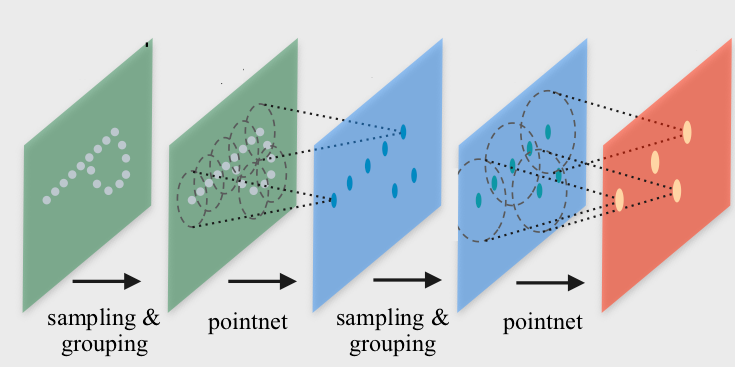

#### Phase 1: Grouping via Dynamic Graph Generation

PyTorch Geometric provides utilities for dynamic graph generation via its helper package [`torch_cluster`](https://github.com/rusty1s/pytorch_cluster), in particular via the [`knn_graph`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.pool.knn_graph) and [`radius_graph`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.pool.radius_graph) functions for $k$-nearest neighbor and ball query graph generation, respectively.

Let's see the `knn_graph` functionality in action:

torch.Size([2, 1536])


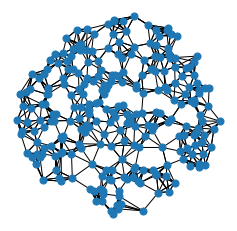

torch.Size([2, 1536])


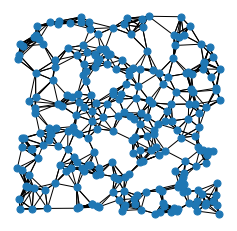

In [ ]:
from torch_cluster import knn_graph

data = dataset[0]
data.edge_index = knn_graph(data.pos, k=6)
print(data.edge_index.shape)
visualize_points(data.pos, edge_index=data.edge_index)

data = dataset[4]
data.edge_index = knn_graph(data.pos, k=6)
print(data.edge_index.shape)
visualize_points(data.pos, edge_index=data.edge_index)

Here, we import the `knn_graph` function from `torch_cluster` and call it by passing in the input points `pos` and the number of nearest neighbors `k`.
As output, we will receive an `edge_index` tensor of shape `[2, num_edges]`, which will hold the information of source and target node indices in each column (known as the sparse matrix COO format).

#### Phase 2: Neighborhood Aggregation

The **[PointNet++](https://arxiv.org/abs/1706.02413) layer** follows a simple *neural message passing scheme* defined via

$$
\mathbf{h}^{(\ell + 1)}_i = \max_{j \in \mathcal{N}(i)} \textrm{MLP} \left( \mathbf{h}_j^{(\ell)}, \mathbf{p}_j - \mathbf{p}_i \right)
$$
where
* $\mathbf{h}_i^{(\ell)} \in \mathbb{R}^d$ denotes the hidden features of point $i$ in layer $\ell$
* $\mathbf{p}_i \in \mathbb{R}^3$ denotes the position of point $i$.

We can make use of the [`MessagePassing`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html) interface to implement this layer.
The `MessagePassing` interface helps us in **creating message passing graph neural networks** by automatically taking care of message propagation.
Here, we only need to define its `message` function as well as  which aggregation scheme to use, *.e.g.*, `aggr="max"` (see [here](https://pytorch-geometric.readthedocs.io/en/latest/notes/create_gnn.html) for the accompanying tutorial):

In [ ]:
from torch.nn import Sequential, Linear, ReLU
from torch_geometric.nn import MessagePassing


class PointNetLayer(MessagePassing):
    def __init__(self, in_channels, out_channels):
        # Message passing with "max" aggregation.
        super(PointNetLayer, self).__init__('max')
        
        # Initialization of the MLP:
        # Here, the number of input features correspond to the hidden node
        # dimensionality plus point dimensionality (=3).
        self.mlp = Sequential(Linear(in_channels + 3, out_channels),
                              ReLU(),
                              Linear(out_channels, out_channels))
        
    def forward(self, h, pos, edge_index):
        # Start propagating messages.
        return self.propagate(edge_index, h=h, pos=pos)
    
    def message(self, h_j, pos_j, pos_i):
        # h_j defines the features of neighboring nodes as shape [num_edges, in_channels]
        # pos_j defines the position of neighboring nodes as shape [num_edges, 3]
        # pos_i defines the position of central nodes as shape [num_edges, 3]

        input = pos_j - pos_i  # Compute spatial relation.

        if h_j is not None:
            # In the first layer, we may not have any hidden node features,
            # so we only combine them in case they are present.
            input = torch.cat([h_j, input], dim=-1)

        return self.mlp(input)  # Apply our final MLP.

As one can see, implementing the PointNet++ layer is quite straightforward in PyTorch Geometric.
In the `__init__` function, we first define that we want to apply **`max` aggregation**, and afterwards initialize an MLP that takes care of transforming neighboring node features and the spatial relation between source and destination nodes to a (trainable) message.

In the `forward` function, we can start **propagating messages** based on `edge_index`, and pass in everything needed in order to create messages.
In the `message` function, we can now access neighboring and central node information via `*_j` and `*_i`, respectively, and return a message for each edge.

### Network Architecture

We can make use of `knn_graph` and the `PointNetLayer` to define our network architecture.
Here, we are interested in an architecture that is able to operate on point clouds in a **mini-batch fashion**.
PyTorch Geometric achieves parallelization over mini-batches by creating sparse block diagonal adjacency matrices (defined by `edge_index`) and concatenating feature matrices in the node dimension (such as `pos`).
For distinguishing examples in a mini-batch, there exists a special vector named [**`batch`**](https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html#mini-batches) of shape `[num_nodes]`, which maps each node to its respective graph in the batch:
$$
\textrm{batch} = {[ 0 \cdots 0, 1 \cdots n-2 n-1 \cdots n - 1 ]}^{\top}
$$

We need to make use of this `batch` vector for the `knn_graph` generation since we do not want to connect nodes from different examples.

With this, our overall `PointNet` architecture looks as follows:

In [ ]:
import torch
import torch.nn.functional as F
from torch_cluster import knn_graph
from torch_geometric.nn import global_max_pool


class PointNet(torch.nn.Module):
    def __init__(self):
        super(PointNet, self).__init__()

        torch.manual_seed(12345)
        self.conv1 = PointNetLayer(3, 32)
        self.conv2 = PointNetLayer(32, 32)
        self.classifier = Linear(32, dataset.num_classes)
        
    def forward(self, pos, batch):
        # Compute the kNN graph:
        # Here, we need to pass the batch vector to the function call in order
        # to prevent creating edges between points of different examples.
        # We also add `loop=True` which will add self-loops to the graph in
        # order to preserve central point information.
        edge_index = knn_graph(pos, k=16, batch=batch, loop=True)
        
        # 3. Start bipartite message passing.
        h = self.conv1(h=pos, pos=pos, edge_index=edge_index)
        h = h.relu()
        h = self.conv2(h=h, pos=pos, edge_index=edge_index)
        h = h.relu()

        # 4. Global Pooling.
        h = global_max_pool(h, batch)  # [num_examples, hidden_channels]
        
        # 5. Classifier.
        return self.classifier(h)


model = PointNet()
print(model)

PointNet(
  (conv1): PointNetLayer(
    (mlp): Sequential(
      (0): Linear(in_features=6, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=32, bias=True)
    )
  )
  (conv2): PointNetLayer(
    (mlp): Sequential(
      (0): Linear(in_features=35, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=32, bias=True)
    )
  )
  (classifier): Linear(in_features=32, out_features=40, bias=True)
)


Here, we create our network architecture by inheriting from **`torch.nn.Module`** and initialize **two `PointNetLayer` modules** and a **final linear classifier** ([`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear)) in its constructor.

In the `forward` method, we first dynamically generate a **16-nearest neighbor graph** based on the position `pos` of nodes.
Based on the resulting graph connectivity, we apply two graph-based convolutional operators and enhance them by ReLU non-linearities.
The first operator takes in 3 input features (the positions of nodes) and maps them to 32 output features.

After that, each point holds information about **its 2-hop neighborhood**, and should already be able to distinguish between simple local shapes.

Next, we apply a **global graph readout function**, *i.e.*, `global_max_pool`, which takes the maximum value along the node dimension for each example.
Last, we apply a linear classifier to map the remaining 32 features to **one of the 40 classes**.

### Training Procedure

We are now ready to write two simple procedures to train and test our model on the training and test dataset, respectively.
If you are not new to PyTorch, this scheme should appear familar to you.
Otherwise, the PyTorch docs provide [a good introduction on how to train a neural network in PyTorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-loss-function-and-optimizer).

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

from torch_geometric.data import DataLoader

train_dataset = GeometricShapes(root='data/GeometricShapes', train=True,
                                transform=SamplePoints(128))
test_dataset = GeometricShapes(root='data/GeometricShapes', train=False,
                               transform=SamplePoints(128))


train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10)

model = PointNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.

def train(model, optimizer, loader):
    model.train()
    
    total_loss = 0
    for data in loader:
        optimizer.zero_grad()  # Clear gradients.
        logits = model(data.pos, data.batch)  # Forward pass.
        loss = criterion(logits, data.y)  # Loss computation.
        loss.backward()  # Backward pass.
        optimizer.step()  # Update model parameters.
        total_loss += loss.item() * data.num_graphs

    return total_loss / len(train_loader.dataset)


@torch.no_grad()
def test(model, loader):
    model.eval()

    total_correct = 0
    for data in loader:
        logits = model(data.pos, data.batch)
        pred = logits.argmax(dim=-1)
        total_correct += int((pred == data.y).sum())

    return total_correct / len(loader.dataset)

for epoch in range(1, 51):
    loss = train(model, optimizer, train_loader)
    test_acc = test(model, test_loader)
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Test Accuracy: {test_acc:.4f}')

<IPython.core.display.Javascript object>

Epoch: 01, Loss: 3.7506, Test Accuracy: 0.0250
Epoch: 02, Loss: 3.6888, Test Accuracy: 0.0500
Epoch: 03, Loss: 3.6653, Test Accuracy: 0.0250
Epoch: 04, Loss: 3.6282, Test Accuracy: 0.0250
Epoch: 05, Loss: 3.5821, Test Accuracy: 0.0250
Epoch: 06, Loss: 3.5176, Test Accuracy: 0.0250
Epoch: 07, Loss: 3.4756, Test Accuracy: 0.0250
Epoch: 08, Loss: 3.4030, Test Accuracy: 0.0500
Epoch: 09, Loss: 3.3647, Test Accuracy: 0.0500
Epoch: 10, Loss: 3.3077, Test Accuracy: 0.0750
Epoch: 11, Loss: 3.2791, Test Accuracy: 0.0500
Epoch: 12, Loss: 3.1910, Test Accuracy: 0.1000
Epoch: 13, Loss: 3.1354, Test Accuracy: 0.1500
Epoch: 14, Loss: 3.0816, Test Accuracy: 0.1500
Epoch: 15, Loss: 2.9887, Test Accuracy: 0.2250
Epoch: 16, Loss: 2.9204, Test Accuracy: 0.2250
Epoch: 17, Loss: 2.8063, Test Accuracy: 0.1750
Epoch: 18, Loss: 2.5911, Test Accuracy: 0.2750
Epoch: 19, Loss: 2.5812, Test Accuracy: 0.3500
Epoch: 20, Loss: 2.3752, Test Accuracy: 0.3000
Epoch: 21, Loss: 2.4296, Test Accuracy: 0.2500
Epoch: 22, Lo

As one can see, we are able to achieve around **75-80% test accuracy**, even when training only on a single example per class (note that we can certainly increase performance by training longer and make use of deeper neural networks).

**However, there is one caveat:**
Since our model takes in node positions as input features, and uses relational Cartesian coordinates for creating messages, *i.e.* $\mathbf{p}_j - \mathbf{p}_i$, it does not generalize across different rotations applied to the input point cloud.

Let's verify this in an example, where we apply random rotations to the test data by composing [`RandomRotate`](https://pytorch-geometric.readthedocs.io/en/latest/modules/transforms.html#torch_geometric.transforms.RandomRotate) transformations along different axes:

Data(face=[3, 30], pos=[32, 3], y=[1])


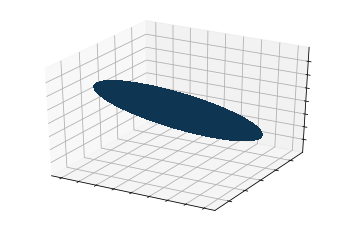

Data(face=[3, 2], pos=[4, 3], y=[1])


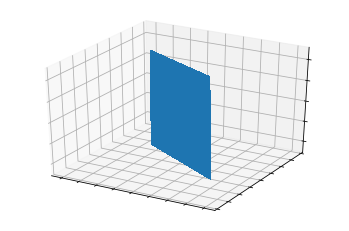

In [ ]:
from torch_geometric.transforms import Compose, RandomRotate

torch.manual_seed(123)

random_rotate = Compose([
    RandomRotate(degrees=180, axis=0),
    RandomRotate(degrees=180, axis=1),
    RandomRotate(degrees=180, axis=2),
])

dataset = GeometricShapes(root='data/GeometricShapes', transform=random_rotate)

data = dataset[0]
print(data)
visualize_mesh(data.pos, data.face)

data = dataset[4]
print(data)
visualize_mesh(data.pos, data.face)

In [ ]:
torch.manual_seed(42)

transform = Compose([
    random_rotate,
    SamplePoints(num=128),
])

test_dataset = GeometricShapes(root='data/GeometricShapes', train=False,
                               transform=transform)

test_loader = DataLoader(test_dataset, batch_size=10)

test_acc = test(model, test_loader)
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.1750


What a bummer!
By randomly rotating the examples in our test dataset, our model performance **decreased to 17.5%**.

The good thing is that there are ways to fix this, so let's learn about rotation-invariant point cloud processing in the upcoming exercise.


### (Optional) Exercises

#### 1. Rotation-invariant PointNet Layer

The **[PPFNet](https://arxiv.org/abs/1802.02669)** is an extension to the PointNet++ architecture that makes it **rotation-invariant**.
More specifically, PPF stands for **Point Pair Feature**, which describes the relation between two points by a rotation-invariant 4D descriptor
$$
\left( \| \mathbf{p}_j - \mathbf{p}_i \|_2, \angle(\mathbf{n}_i, \mathbf{p}_j - \mathbf{p}_i), \angle(\mathbf{n}_j, \mathbf{p}_j - \mathbf{p}_i), \angle(\mathbf{n}_i, \mathbf{n}_j) \right)
$$
based on
1. the distance between points $\| \mathbf{p}_j - \mathbf{p}_i \|_2$ and
2. the angles between $\mathbf{p}_j - \mathbf{p}_i$ and the **normal vectors** $\mathbf{n}_i$ and $\mathbf{n}_j$ of points $i$ and $j$, respectively.

Luckily, in addition to the [`PointConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.PointConv), PyTorch Geometric also provides an implementation of the `PointConv` based on the Point Pair Feature descriptor, see **[`PPFConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.PPFConv)**.
Furthermore, the [`SamplePoints`](https://pytorch-geometric.readthedocs.io/en/latest/modules/transforms.html) transformation does also provide **normal vectors** in `data.normal` for each sampled point when called via `SamplePoints(num_points, include_normals=True)`.

As an exercise, can you extend the example code below in order to instantiate the `PPFConv` modules?

**Tipp**:

The `PPFConv` expects an MLP as first argument, which is similar to the one created earlier in the `PointNetLayer`. Note that in `PPFConv`, we now have a 4D discriptor instead of a 3D one.

In [ ]:
from torch_geometric.nn import PPFConv
from torch_cluster import fps


class PPFNet(torch.nn.Module):
    def __init__(self):
        super(PPFNet, self).__init__()

        torch.manual_seed(12345)
        mlp1 = ...  # TODO
        self.conv1 = PPFConv(...)  # TODO
        mlp2 = ...  # TODO
        self.conv2 = PPFConv(...)  # TODO
        self.classifier = Linear(32, dataset.num_classes)
        
    def forward(self, pos, normal, batch):
        edge_index = knn_graph(pos, k=16, batch=batch, loop=False)
        
        x = self.conv1(x=None, pos=pos, normal=normal, edge_index=edge_index)
        x = x.relu()
        x = self.conv2(x=x, pos=pos, normal=normal, edge_index=edge_index)
        x = x.relu()

        x = global_max_pool(x, batch)  # [num_examples, hidden_channels]
        return self.classifier(x)


model = PPFNet()
print(model)

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

test_transform = Compose([
    random_rotate,
    SamplePoints(num=128, include_normals=True),
])

train_dataset = GeometricShapes(root='data/GeometricShapes', train=False,
                               transform=SamplePoints(128, include_normals=True))
test_dataset = GeometricShapes(root='data/GeometricShapes', train=False,
                               transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10)

model = PPFNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.

def train(model, optimizer, loader):
    model.train()
    
    total_loss = 0
    for data in loader:
        optimizer.zero_grad()  # Clear gradients.
        logits = model(data.pos, data.normal, data.batch)
        loss = criterion(logits, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs

    return total_loss / len(train_loader.dataset)


@torch.no_grad()
def test(model, loader):
    model.eval()

    total_correct = 0
    for data in loader:
        logits = model(data.pos, data.normal, data.batch)
        pred = logits.argmax(dim=-1)
        total_correct += int((pred == data.y).sum())

    return total_correct / len(loader.dataset)

for epoch in range(1, 101):
    loss = train(model, optimizer, train_loader)
    test_acc = test(model, test_loader)
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Test Accuracy: {test_acc:.4f}')

#### 2. Downsampling Phase via Farthest Point Sampling

So far, we haven't made use of downsampling/pooling the point cloud.
In the PointNet++ architecture, downsampling of a point clouds is achieved via the **Farthest Point Sampling** (FPS) procedure, which, in return, allows the network to extract more and more global features.
Given an input point set $\{ \mathbf{p}_1, \ldots \mathbf{p}_n \}$, FPS iteratively selects a subset of points such that the sampled points are furthest apart.
Specifically, compared with random sampling, this procedure is known to have better coverage of the entire point set.

Luckily, PyTorch Geometric provides a ready-to-use implementation of [`fps`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.pool.fps), which takes in the position of nodes and a sampling ratio, and returns the indices of nodes that have been sampled:

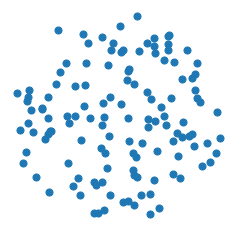

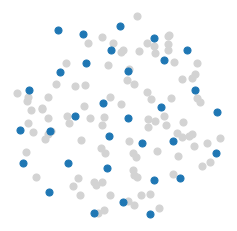

In [ ]:
from torch_cluster import fps

dataset = GeometricShapes(root='data/GeometricShapes', transform=SamplePoints(128))

data = dataset[0]
index = fps(data.pos, ratio=0.25)

visualize_points(data.pos)
visualize_points(data.pos, index=index)


With this, can you modify the `PPFNet` model to include a farthest point sampling step (`ratio=0.5`) in between the two convolution operators?

**Tipp:**

For `fps`, you also need to pass in the `batch` vector, so that points in different examples are sampled independently from each other:
```
index = fps(pos, batch, ratio=0.5)
```
You can now pool the points, their normals, the features and the batch vector via:
```
pos = pos[index]
normal = normal[index]
h = h[index]
batch = batch[index]
```
This will just keep the points sampled by `fps`.

Note that you also need to create a new $k$-NN graph after applying the pooling operation.

## Deep Unsupervised Networks for Graphs



# Hyperbolic Embeddings

- Hyberbolic Graph Convolutional Neural Networks: [blog post by Stanford team](https://dawn.cs.stanford.edu/2018/03/19/hyperbolics/) - [code](https://github.com/HazyResearch/hgcn)

- Word embeddings - for e.g [Poincare embeddings](https://mnick.github.io/project/geometric-representation-learning/) - [code](https://github.com/facebookresearch/poincare-embeddings)
- Hyperbolic Image Embeddings - [code](https://github.com/leymir/hyperbolic-image-embeddings)

# Homework

In this homework, you will be applying a series of machine learning and deep learning methods on graphs and networks.

**1)** Find and load a graph/network based dataset which is relevant to your field of social sciences.

**2)** Create a shallow embedding of your nodes and edges, and apply some distance metrics on these to identify which nodes and edges are similar.

**3)** Perform a machine learning method on your graph for node classification, edge classification, link prediction, or community detection.

**4)** Perform a deep learning method on your graph for node classification, edge classification, link prediction, or community detection.